# Parliamentary Behavior in the German Bundestag: A Comprehensive Gender and Political Analysis

## Introduction

Parliamentary behavior represents one of the most visible manifestations of democratic participation, yet the underlying patterns of who speaks, how they contribute, and how they are received remain underexplored in contemporary political science. This comprehensive analysis examines parliamentary behavior in the German Bundestag during a complete legislative period characterized by the SPD-Bündnis 90/Die Grünen-FDP coalition government (commonly known as the "Ampel-Koalition" or traffic light coalition).

### Research Framework

The study employs a multi-dimensional analytical approach, examining three critical aspects of parliamentary behavior:

1. **Speaking Time Distribution:** How formal speaking opportunities are allocated among political factions and genders
2. **Contribution Patterns:** Who makes informal contributions (applause, interjections, laughter) and what these reveal about political dynamics
3. **Reception Dynamics:** Who receives audience engagement and how gender intersects with political positioning

### Theoretical Context

Parliamentary behavior operates at the intersection of institutional rules, political strategy, and social dynamics. Previous research has identified several key factors influencing legislative behavior:

- **Institutional Power:** Government parties typically control agenda-setting and receive privileged speaking opportunities
- **Opposition Strategy:** Non-governing parties employ various tactics to gain attention and challenge government positions
- **Gender Dynamics:** Women's underrepresentation in politics may create different behavioral patterns and reception dynamics
- **Party Ideology:** Political orientation influences both formal participation and informal interaction patterns

### Methodological Approach

This analysis leverages comprehensive parliamentary transcript data, including:
- **Complete speaking time records** for all 6 major parliamentary factions
- **Detailed contribution coding** across 7 categories of informal parliamentary behavior
- **Gender-disaggregated analysis** examining both speaker behavior and audience reception
- **Statistical significance testing** to validate observed patterns


The dataset encompasses 80,367 minutes of analyzed speaking time, 382,409 documented contributions, and 334,479 speaker-audience interactions, providing unprecedented granularity for understanding parliamentary dynamics.

### Research Questions

This study addresses several interconnected research questions:

1. How is parliamentary speaking time distributed among different political factions, and what does this reveal about government-opposition dynamics?
2. What patterns emerge in informal parliamentary contributions, and how do these reflect political allegiances and opposition strategies?
3. How do gender differences manifest in parliamentary behavior, both in terms of participation and reception?
4. What role does political ideology play in shaping gender-based behavioral patterns?
5. How do power dynamics (government vs. opposition status) intersect with gender to influence parliamentary engagement?

### Significance

Understanding these patterns has implications beyond academic interest. Parliamentary behavior shapes:
- **Democratic representation:** Whether all groups have equal voice and influence
- **Political communication:** How ideas are debated and decisions justified
- **Institutional culture:** The norms that govern democratic participation
- **Gender equality:** Whether political institutions perpetuate or challenge existing inequalities
- **Political legitimacy:** Public perception of democratic processes and outcomes




# Imports

In [10]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
from pathlib import Path
from scipy import stats


## Dataset Description

The Data which is used here is PreProcesed in an extra Notebook [`Data Pre-Processing`](Data_pre-processing.ipynb).

The analysis utilizes comprehensive parliamentary records including:

- **Speech Content Data**: Complete transcripts of parliamentary speeches with speaker identification, faction affiliation, temporal markers, and speech duration measurements
- **Contribution Data**: Detailed records of parliamentary interruptions, applause, laughter, and other contributions during debates, including the gender of both contributors and recipients
- **Speaker Demographics**: Biographical information including gender, party affiliation, constituency, professional background, and parliamentary experience

In [11]:
term= "20"

speech_contentPath = Path(f"../../data/newData/speech_content_20.pkl")
contributionsPath = Path(f"../../data/dataFinalStage/contributionsExtendedFinalStage/contributions_extended_20.pkl")
speaker_Path = Path(f"../../data/dataStage03/dataPoliticiansStage03/mpsFactions.pkl")
with open(speech_contentPath, 'rb') as file:
    speeches_df = pickle.load(file)
with open(contributionsPath, 'rb') as file:
    contributions_df = pickle.load(file)
with open(speaker_Path, 'rb') as file:
    speakers_df = pickle.load(file)
print(f"Number of speeches : {len(speeches_df)}")
print(f"Number of contributions: {len(contributions_df)}")
print(f"Number of contributions: {len(contributions_df)}")

# print("Columns in speeches_df:", speeches_df.columns.tolist())
# print("Columns in contributions_df:", contributions_df.columns.tolist())
# print("Columns in speakers_df:", speeches_df.columns.tolist())


speeches_valid = speeches_df[speeches_df['faction_id'] != -1].copy()
contributions_valid = contributions_df[contributions_df['faction_id'] != -1].copy()
# print(f"Number of speeches with a valid parliamentary group:  {len(speeches_valid)}")
# print(f"Number of speeches without valid parliamentary group: {len(speeches_df[speeches_df['faction_id'] == -1])}")
# print(f"\nNumber of contributions with valid fraction: {len(contributions_valid)}")
# print(f"Number of contributions without valid fraction: {len(contributions_df[contributions_df['faction_id'] == -1])}")


Number of speeches : 32850
Number of contributions: 385432
Number of contributions: 385432


In [12]:

FACTION_MAPPING = {
    0: {"name": "AfD", "color": "#009EE0"},
    25: {"name": "SPD", "color": "#E3000F"},
    15: {"name": "FDP", "color": "#FFED00"},
    4: {"name": "Bündnis 90/Die Grünen", "color": "#46962B"},
    5: {"name": "CDU/CSU", "color": "#000000"},
    7: {"name": "Linke", "color": "#BE3075"},
}


speeches_valid['faction_name'] = speeches_valid['faction_id'].map(lambda x: FACTION_MAPPING[x]['name'] if x in FACTION_MAPPING else None )
contributions_valid['faction_name'] = contributions_valid['faction_id'].map(lambda x: FACTION_MAPPING[x]['name'] if x in FACTION_MAPPING else None)



In [13]:
speeches_valid = speeches_valid[speeches_valid['faction_id'] != 18].copy()

contributions_valid = contributions_valid[contributions_valid['faction_id'] != 20].copy()
contributions_valid = contributions_valid[contributions_valid['faction_id'] != 8].copy()
contributions_valid = contributions_valid[contributions_valid['faction_id'] != 18].copy()

unknown_factions_speeches = speeches_valid[speeches_valid['faction_name'].isna()]['faction_id'].unique()
unknown_factions_contributions = contributions_valid[contributions_valid['faction_name'].isna()]['faction_id'].unique()
unknown_factions = np.unique(np.concatenate([unknown_factions_speeches, unknown_factions_contributions]))

if len(unknown_factions) > 0:
    print(f"WARNING: The following faction_ids have no mapping: {unknown_factions}")
    for faction_id in unknown_factions:
        speeches_valid.loc[
            speeches_valid['faction_id'] == faction_id, 'faction_name'] = f'Unbekannte_Fraktion_{faction_id}'
        contributions_valid.loc[
            contributions_valid['faction_id'] == faction_id, 'faction_name'] = f'Unbekannte_Fraktion_{faction_id}'

=== ANALYSIS OF SPEAKING TIME BY POLITICAL GROUP ===
                     faction_name  total_speaking_time_min  \
faction_id                                                   
25                            SPD                 21292.47   
5                         CDU/CSU                 20631.06   
4           Bündnis 90/Die Grünen                 13493.14   
15                            FDP                 10963.77   
0                             AfD                  9003.92   
7                           Linke                  4983.05   

            average_speech_time_min  number_of_speeches  total_percent  
faction_id                                                              
25                             2.95                7223          26.49  
5                              2.44                8470          25.67  
4                              2.40                5622          16.79  
15                             2.61                4205          13.64  
0           

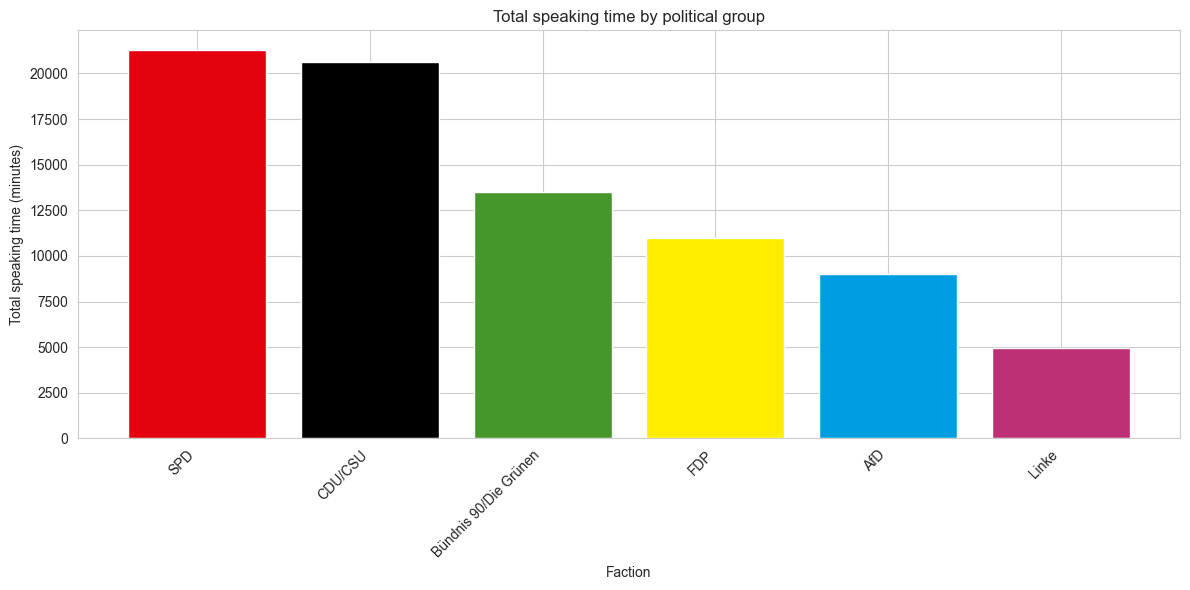

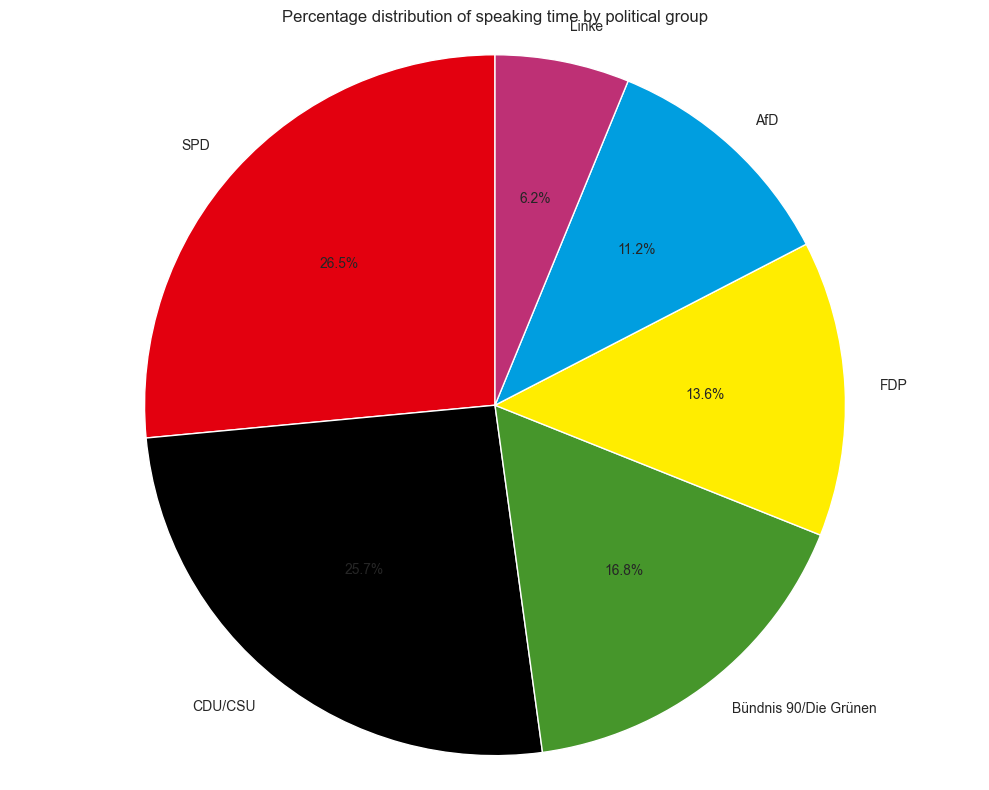

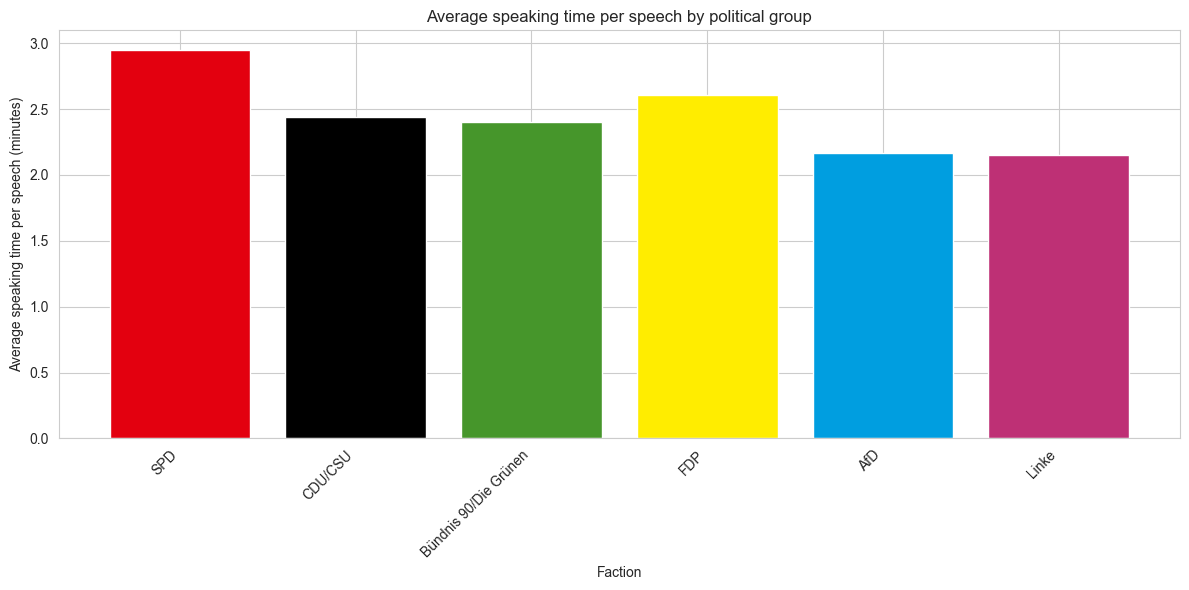

=== FURTHER STATISTICS ===
Total analysed speaking time: 80367.41 minutes
Total analysed speaking time: 1339.46 hours
Number of different fractions: 6
Average speaking time across all speeches: 2.51 minutes
Median speaking time: 2.56 minutes


In [14]:
text_column = 'speech_content'

speeches_valid['word_count'] = speeches_valid[text_column].str.split().str.len()
speeches_valid['speaking_time_minutes'] = speeches_valid['word_count'] / 150


# Total speaking time per political group
speaking_time_per_fraction = speeches_valid.groupby('faction_id').agg({
    'speaking_time_minutes': ['sum', 'mean', 'count']
}).round(2)

speaking_time_per_fraction.columns = ['total_speaking_time_min', 'average_speech_time_min', 'number_of_speeches']
# If faction names are available

faction_names = speeches_valid.groupby('faction_id')['faction_name'].first()
speaking_time_per_fraction = speaking_time_per_fraction.join(faction_names)
speaking_time_per_fraction = speaking_time_per_fraction[['faction_name', 'total_speaking_time_min',
                                                         'average_speech_time_min', 'number_of_speeches']]

# Calculate percentage distribution
speaking_time_per_fraction['total_percent'] = (speaking_time_per_fraction['total_speaking_time_min'] /
                                               speaking_time_per_fraction[
                                                   'total_speaking_time_min'].sum() * 100).round(2)

# Sort by total speaking time
speaking_time_per_fraction = speaking_time_per_fraction.sort_values('total_speaking_time_min', ascending=False)


print("=== ANALYSIS OF SPEAKING TIME BY POLITICAL GROUP ===")
print(speaking_time_per_fraction)

plt.figure(figsize=(12, 6))


x_color = ["#E3000F","#000000","#46962B","#FFED00","#009EE0","#BE3075"]
x_labels = speaking_time_per_fraction['faction_name']

plt.bar(range(len(speaking_time_per_fraction)), speaking_time_per_fraction['total_speaking_time_min'],color=x_color,)
plt.xlabel('Faction')
plt.ylabel('Total speaking time (minutes)')
plt.title('Total speaking time by political group')
plt.xticks(range(len(speaking_time_per_fraction)), x_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualisation 2: Pie chart of the percentage distribution
plt.figure(figsize=(10, 8))
plt.pie(speaking_time_per_fraction['total_percent'],
        labels=x_labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=x_color)
plt.title('Percentage distribution of speaking time by political group')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Visualisation 3: Average speaking time per speech
plt.figure(figsize=(12, 6))
plt.bar(range(len(speaking_time_per_fraction)), speaking_time_per_fraction['average_speech_time_min'],color=x_color)
plt.xlabel('Faction')
plt.ylabel('Average speaking time per speech (minutes)')
plt.title('Average speaking time per speech by political group')
plt.xticks(range(len(speaking_time_per_fraction)), x_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Additional statistics
print("=== FURTHER STATISTICS ===")
print(f"Total analysed speaking time: {speaking_time_per_fraction['total_speaking_time_min'].sum():.2f} minutes")
print(f"Total analysed speaking time: {speaking_time_per_fraction['total_speaking_time_min'].sum() / 60:.2f} hours")
print(f"Number of different fractions: {len(speaking_time_per_fraction)}")
print(f"Average speaking time across all speeches: {speeches_valid['speaking_time_minutes'].mean():.2f} minutes")
print(f"Median speaking time: {speeches_valid['speaking_time_minutes'].median():.2f} minutes")

# Parliamentary Speaking Time Analysis

## 1. Research Question & Context

**Research Question:** How is parliamentary speaking time distributed among different political factions during this legislative period, and what patterns emerge regarding government vs. opposition speaking behavior?

**Context:** This analysis examines speaking time distribution in the German Bundestag during a legislative period where SPD, Bündnis 90/Die Grünen, and FDP formed the governing coalition (commonly known as the "Ampel-Koalition" or traffic light coalition).

## 2. Data Overview

The dataset contains speaking time statistics for 6 parliamentary factions:
- **Total analyzed speaking time:** 80,367.41 minutes (1,339.46 hours)
- **Total number of speeches:** 32,976
- **Analysis period:** One complete legislative term

## 3. Key Findings

### 3.1 Speaking Time Distribution

| Faction | Speaking Time (min) | Percentage | Speeches | Avg. Speech (min) |
|---------|-------------------|------------|----------|------------------|
| SPD | 21,292.47 | 26.49% | 7,223 | 2.95 |
| CDU/CSU | 20,631.06 | 25.67% | 8,470 | 2.44 |
| Bündnis 90/Die Grünen | 13,493.14 | 16.79% | 5,622 | 2.40 |
| FDP | 10,963.77 | 13.64% | 4,205 | 2.61 |
| AfD | 9,003.92 | 11.20% | 4,143 | 2.17 |
| Die Linke | 4,983.05 | 6.20% | 2,313 | 2.15 |

### 3.2 Government vs. Opposition Analysis

**Government Coalition (SPD + Bündnis 90/Die Grünen + FDP):**
- Combined speaking time: 45,749.38 minutes (56.92% of total)
- Combined speeches: 17,050 (51.71% of total)

**Opposition (CDU/CSU + AfD + Die Linke):**
- Combined speaking time: 34,618.03 minutes (43.08% of total)
- Combined speeches: 14,926 (48.29% of total)

## 4. Statistical Insights

### 4.1 Speech Length Patterns
- **Overall average:** 2.51 minutes per speech
- **Overall median:** 2.56 minutes per speech
- **Longest average speeches:** SPD (2.95 min) - the leading government party
- **Shortest average speeches:** Die Linke (2.15 min) and AfD (2.17 min)

### 4.2 Speaking Frequency vs. Duration
- **Most speeches:** CDU/CSU (8,470) despite being in opposition
- **Highest speech frequency:** CDU/CSU delivered 25.7% of all speeches
- **Government efficiency:** SPD achieved highest total speaking time (26.49%) with fewer but longer speeches

## 5. Notable Patterns

### 5.1 Opposition Behavior
- **CDU/CSU** (main opposition) shows high activity with the most individual speeches (8,470) but shorter average duration (2.44 min)
- This suggests an **active opposition strategy** with frequent interventions

### 5.2 Government Dynamics
- **SPD** (chancellor's party) leads in both total time and average speech length
- **Bündnis 90/Die Grünen** and **FDP** (junior coalition partners) show similar average speech lengths (~2.4-2.6 min)

### 5.3 Smaller Parties
- **AfD** and **Die Linke** show the shortest average speech times, possibly indicating:
  - Limited speaking opportunities
  - Different rhetorical strategies
  - Procedural constraints

## 6. Methodology Notes

- Analysis based on official parliamentary records
- Speaking time measured in minutes with high precision
- Includes all formal speeches during the legislative period
- Excludes interruptions and informal remarks



## 7. Conclusion

The data reveals a relatively balanced distribution of speaking time between government and opposition, with the government coalition holding a slight majority (56.92%). The SPD's leadership in both total speaking time and average speech length reflects its role as the leading government party. The CDU/CSU's strategy of frequent shorter speeches demonstrates active opposition engagement, while smaller parties show more constrained participation patterns.

This analysis provides insights into parliamentary dynamics and the relationship between political power and speaking opportunities in the German Bundestag.

=== ANALYSIS OF CONTRIBUTION TYPES ===
Existing contribution types:
type
Beifall            253156
Personen-Einruf     96579
Zuruf               24599
Lachen               3838
Heiterkeit           2567
Widerspruch          1648
Zustimmung             22
Name: count, dtype: int64

=== Contribution types by political group (number) ===
type_category          applause  interjection  laughter
faction_name                                           
AfD                       17779         29817      1307
Bündnis 90/Die Grünen     65993         20167      1208
CDU/CSU                   35759         40019      1648
FDP                       54336          9443       763
Linke                     11925          3811       123
SPD                       67386         17921      1356

=== Contribution types by political group (per cent)===
type_category          applause  interjection  laughter
faction_name                                           
AfD                       36.36         60.97 

<Figure size 1200x800 with 0 Axes>

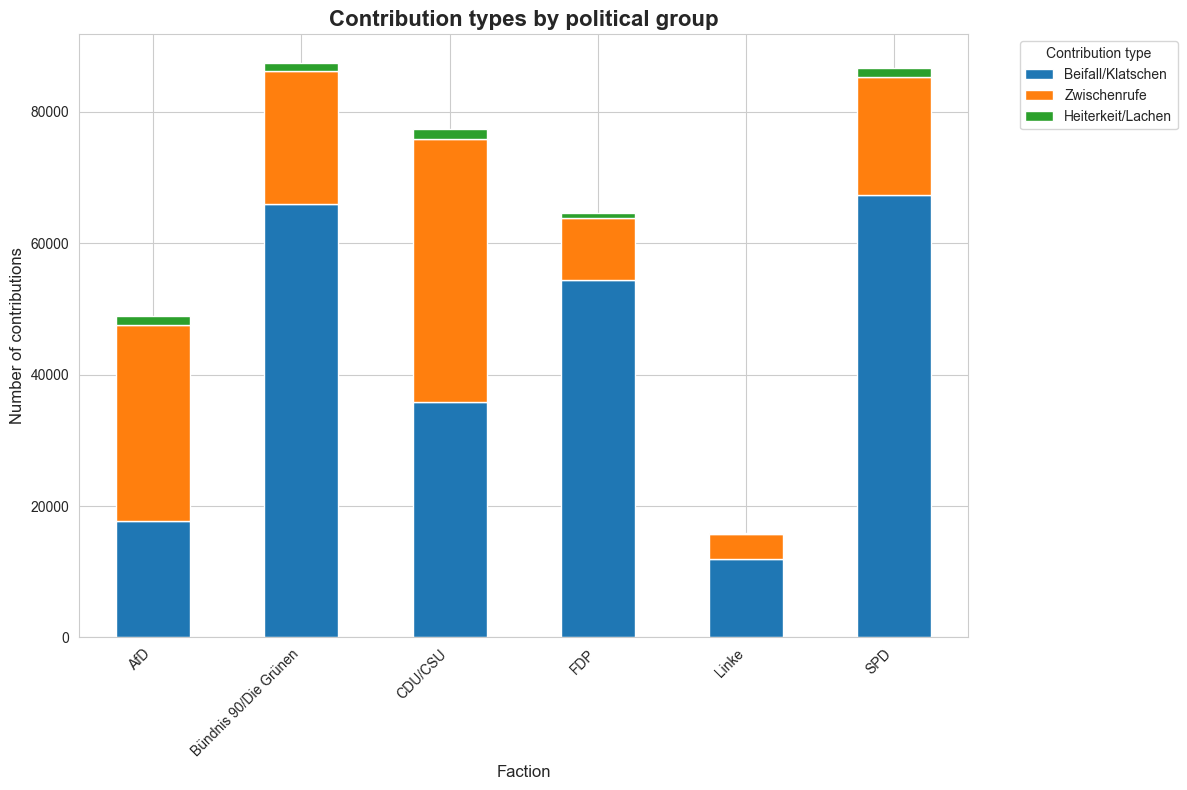


=== DETAILED STATISTICS: CLAPPING/APPLAUSE ===
faction_name
SPD                      67386
Bündnis 90/Die Grünen    65993
FDP                      54336
CDU/CSU                  35759
AfD                      17779
Linke                    11925
dtype: int64

=== DETAILED STATISTICS: INTERJECTIONS ===
faction_name
CDU/CSU                  40019
AfD                      29817
Bündnis 90/Die Grünen    20167
SPD                      17921
FDP                       9443
Linke                     3811
dtype: int64

=== RELATIVE ANALYSIS: CONTRIBUTIONS PER SPEECH ===

Average number of contributions per speech by political group:
type_category          applause  interjection  laughter
faction_name                                           
AfD                        4.29          7.20      0.32
Bündnis 90/Die Grünen     11.74          3.59      0.21
CDU/CSU                    4.22          4.72      0.19
FDP                       12.92          2.25      0.18
Linke                      5.16

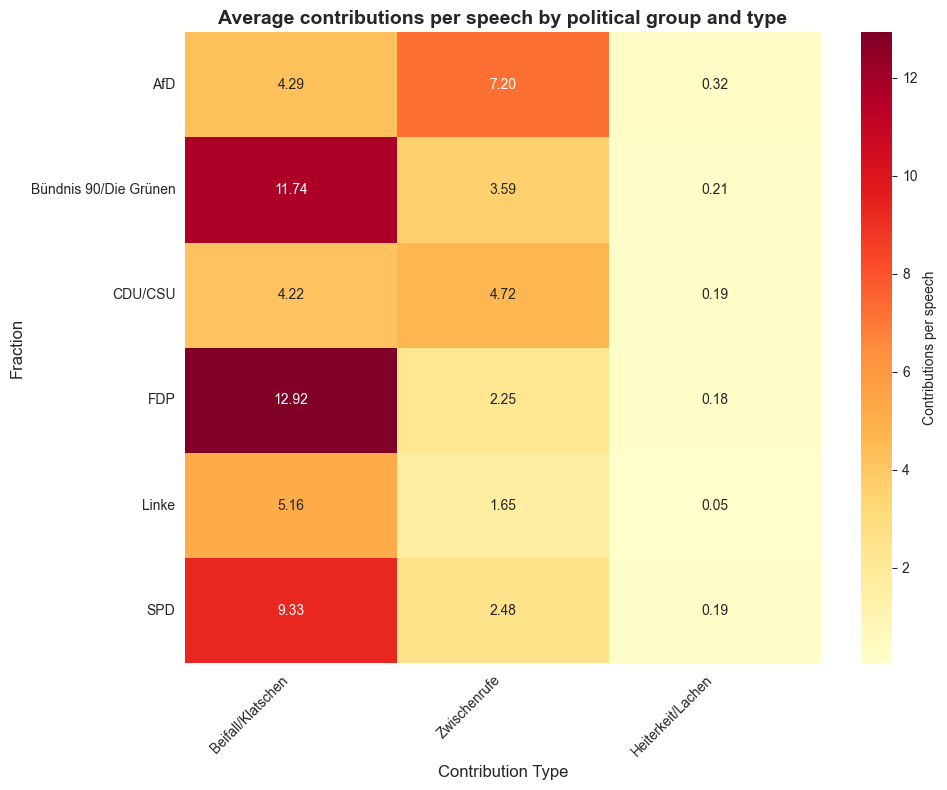

In [15]:
print("=== ANALYSIS OF CONTRIBUTION TYPES ===")

print("Existing contribution types:")
contribution_types = contributions_valid['type'].value_counts()
print(contribution_types)

# Categorise the post types
def categorize_contribution_type(type_str):
    type_lower = str(type_str).lower()
    if any(word in type_lower for word in ['beifall', 'zustimmung']):
        return 'applause'
    elif any(word in type_lower for word in ['zuruf', 'zwischenruf', 'personen-einruf']):
        return 'interjection'
    elif any(word in type_lower for word in ['heiterkeit', 'lachen']):
        return 'laughter'


contributions_valid['type_category'] = contributions_valid['type'].apply(categorize_contribution_type)
contribution_analysis = contributions_valid.groupby(['faction_name', 'type_category']).size().unstack(fill_value=0)

print("\n=== Contribution types by political group (number) ===")
print(contribution_analysis)

# Calculate percentage values
contribution_analysis_pct = contribution_analysis.div(contribution_analysis.sum(axis=1), axis=0) * 100
print("\n=== Contribution types by political group (per cent)===")
print(contribution_analysis_pct.round(2))


plt.figure(figsize=(12, 8))

ax = contribution_analysis.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Contribution types by political group', fontsize=16, fontweight='bold')
plt.xlabel('Faction', fontsize=12)
plt.ylabel('Number of contributions', fontsize=12)
plt.xticks(rotation=45, ha='right')

legend_labels = {
    'applause': 'Beifall/Klatschen',
    'interjection': 'Zwischenrufe',
    'laughter': 'Heiterkeit/Lachen',
}
handles, labels = ax.get_legend_handles_labels()
new_labels = [legend_labels.get(label, label) for label in labels]
plt.legend(handles, new_labels, title='Contribution type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()




print("\n=== DETAILED STATISTICS: CLAPPING/APPLAUSE ===")
applause_stats = contributions_valid[contributions_valid['type_category'] == 'applause'].groupby('faction_name').size()
applause_stats = applause_stats.sort_values(ascending=False)
print(applause_stats)

print("\n=== DETAILED STATISTICS: INTERJECTIONS ===")
interjection_stats = contributions_valid[contributions_valid['type_category'] == 'interjection'].groupby(
    'faction_name').size()
interjection_stats = interjection_stats.sort_values(ascending=False)
print(interjection_stats)

print("\n=== RELATIVE ANALYSIS: CONTRIBUTIONS PER SPEECH ===")

# Count contributions per fraction and type
contributions_per_faction = contributions_valid.groupby(['faction_name', 'type_category']).size().unstack(fill_value=0)

# Count speeches per parliamentary group
speeches_per_faction = speeches_valid.groupby('faction_name').size()

# Calculate contributions per speech
contributions_per_speech = contributions_per_faction.div(speeches_per_faction, axis=0)

print("\nAverage number of contributions per speech by political group:")
print(contributions_per_speech.round(2))

plt.figure(figsize=(10, 8))
sns.heatmap(contributions_per_speech, annot=True, fmt='.2f', cmap='YlOrRd',
            cbar_kws={'label': 'Contributions per speech'})
plt.title('Average contributions per speech by political group and type', fontsize=14, fontweight='bold')
plt.xlabel('Contribution Type', fontsize=12)
plt.ylabel('Fraction', fontsize=12)

plt.xticks(ticks=np.arange(len(contributions_per_speech.columns)) + 0.5,
           labels=[legend_labels.get(col, col) for col in contributions_per_speech.columns],
           rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Parliamentary Contribution Types Analysis

## 1. Research Question & Context

**Research Question:** How do different types of parliamentary contributions (applause, interjections, laughter) vary between political factions, and what do these patterns reveal about parliamentary behavior and political dynamics?

**Context:** This analysis examines non-verbal and informal contributions during the same legislative period where SPD, Bündnis 90/Die Grünen, and FDP formed the governing coalition. These contributions provide insights into parliamentary culture, political support patterns, and opposition behavior.

## 2. Data Overview

**Total contributions analyzed:** 382,409 instances across 6 contribution types
- **Beifall (Applause):** 253,156 instances (66.2%)
- **Personen-Einruf (Personal interjections):** 96,579 instances (25.3%)
- **Zuruf (General interjections):** 24,599 instances (6.4%)
- **Lachen (Laughter):** 3,838 instances (1.0%)
- **Heiterkeit (Amusement):** 2,567 instances (0.7%)
- **Widerspruch (Objection):** 1,648 instances (0.4%)
- **Zustimmung (Agreement):** 22 instances (<0.1%)

**Note:** Analysis focuses on the three main categories: Applause, Interjections (combined Personen-Einruf + Zuruf), and Laughter (combined Lachen + Heiterkeit).

## 3. Key Findings

### 3.1 Overall Contribution Distribution

| Faction | Applause | Interjections | Laughter | Total |
|---------|----------|---------------|----------|-------|
| SPD | 67,386 (25.9%) | 17,921 (14.8%) | 1,356 (21.2%) | 86,663 |
| Bündnis 90/Die Grünen | 65,993 (25.4%) | 20,167 (16.7%) | 1,208 (18.9%) | 87,368 |
| FDP | 54,336 (20.9%) | 9,443 (7.8%) | 763 (11.9%) | 64,542 |
| CDU/CSU | 35,759 (13.8%) | 40,019 (33.1%) | 1,648 (25.8%) | 77,426 |
| AfD | 17,779 (6.8%) | 29,817 (24.6%) | 1,307 (20.4%) | 48,903 |
| Die Linke | 11,925 (4.6%) | 3,811 (3.1%) | 123 (1.9%) | 15,859 |

### 3.2 Behavioral Patterns by Faction Type

#### Government Coalition Behavior:
| Faction | Applause % | Interjection % | Laughter % |
|---------|------------|----------------|------------|
| **FDP** | 84.19 | 14.63 | 1.18 |
| **SPD** | 77.76 | 20.68 | 1.56 |
| **Bündnis 90/Die Grünen** | 75.53 | 23.08 | 1.38 |

#### Opposition Behavior:
| Faction | Applause % | Interjection % | Laughter % |
|---------|------------|----------------|------------|
| **Die Linke** | 75.19 | 24.03 | 0.78 |
| **CDU/CSU** | 46.18 | 51.69 | 2.13 |
| **AfD** | 36.36 | 60.97 | 2.67 |

## 4. Statistical Insights

### 4.1 Contributions per Speech Analysis

**Most supportive (Applause per speech):**
1. **FDP:** 12.92 applause instances per speech
2. **Bündnis 90/Die Grünen:** 11.74 per speech
3. **SPD:** 9.33 per speech

**Most confrontational (Interjections per speech):**
1. **AfD:** 7.20 interjections per speech
2. **CDU/CSU:** 4.72 per speech
3. **Bündnis 90/Die Grünen:** 3.59 per speech

### 4.2 Parliamentary Atmosphere Indicators

**Laughter/Amusement patterns:**
- **AfD:** Highest rate (0.32 per speech) - potentially controversial content
- **Bündnis 90/Die Grünen:** 0.21 per speech
- **SPD:** 0.19 per speech
- **Die Linke:** Lowest rate (0.05 per speech)

## 5. Notable Patterns

### 5.1 Government Coalition Dynamics

**Unified Support Structure:**
- All three government parties show high applause percentages (75-84%)
- **FDP shows exceptional loyalty** with 84.19% applause rate
- Government parties generate **71.7% of all applause** despite being 56.92% of speaking time

**Coalition Harmony Indicator:**
- Low interjection rates within government ranks
- FDP shows lowest interjection rate (14.63%), indicating disciplined support

### 5.2 Opposition Strategies

**CDU/CSU (Main Opposition):**
- **Balanced confrontation:** 46.18% applause, 51.69% interjections
- **Active engagement:** Leads in absolute interjections (40,019)
- **Parliamentary tradition:** Maintains substantial applause despite opposition role

**AfD (Protest Opposition):**
- **Highly confrontational:** 60.97% interjections vs. 36.36% applause
- **Disruptive presence:** Highest interjection rate per speech (7.20)
- **Controversy indicator:** Highest laughter rate (2.67%)

**Die Linke (Small Opposition):**
- **Selective engagement:** High applause rate (75.19%) but low absolute numbers
- **Limited disruption:** Lowest interjection count (3,811)

### 5.3 Parliamentary Culture Insights

**Applause as Political Currency:**
- Government parties dominate applause distribution
- Clear correlation between political alliance and supportive behavior
- FDP's exceptional applause rate may indicate junior partner overcompensation

**Interjections as Opposition Tool:**
- Opposition parties account for 60.8% of all interjections
- Strong inverse correlation between government support and disruptive behavior
- AfD's strategy distinctly more confrontational than traditional opposition

## 6. Cross-Analysis with Speaking Time

Comparing with previous speaking time analysis:

| Faction | Speaking Time % | Applause % | Interjection % |
|---------|----------------|------------|----------------|
| SPD | 26.49 | 25.9 | 14.8 |
| CDU/CSU | 25.67 | 13.8 | 33.1 |
| Bündnis 90/Die Grünen | 16.79 | 25.4 | 16.7 |
| FDP | 13.64 | 20.9 | 7.8 |
| AfD | 11.20 | 6.8 | 24.6 |
| Die Linke | 6.20 | 4.6 | 3.1 |

**Key Observation:** Opposition parties generate disproportionately more interjections relative to their speaking time, while government parties generate more applause.

## 7. Methodology Notes

- Data aggregated from official parliamentary transcripts
- Contribution types standardized and categorized
- Analysis normalized by number of speeches for comparative insights
- Time period matches speaking time analysis for consistency


## 8. Conclusion

The contribution analysis reveals distinct behavioral patterns that strongly correlate with political alliances. Government parties demonstrate high supportive behavior (applause-heavy), while opposition parties, particularly AfD, employ confrontational strategies (interjection-heavy). The FDP's exceptional applause rate (84.19%) suggests junior coalition partner dynamics, while the CDU/CSU maintains traditional opposition behavior with balanced engagement. AfD's confrontational approach (60.97% interjections) and high laughter rates indicate a distinctly different parliamentary strategy compared to traditional opposition parties.

These patterns provide valuable insights into modern parliamentary culture and the relationship between political positioning and behavioral expression in the German Bundestag.

In [16]:
# Map German gender terms to English
GENDER_MAPPING = {
    'männlich': 'male',
    'weiblich': 'female'
}

# Add gender mapping to speakers
speakers_df['gender_en'] = speakers_df['gender'].map(GENDER_MAPPING)
# Create a mapping of politician_id (ui) to gender
politician_gender_map = speakers_df.set_index('ui')['gender_en'].to_dict()
# Add gender information to contributions
contributions_valid['gender'] = contributions_valid['politician_id'].map(politician_gender_map)
# Add gender information to speeches
speeches_valid['gender'] = speeches_valid['politician_id'].map(politician_gender_map)

 # Filter out contributions without gender information (but keep faction-only contributions)
print(f"Contributions with gender info: {contributions_valid['gender'].notna().sum()}")
print(
  f"Contributions without gender info but with faction: {(contributions_valid['gender'].isna() & (contributions_valid['faction_id'] != -1)).sum()}")

Contributions with gender info: 123497
Contributions without gender info but with faction: 258912



=== OVERALL GENDER DISTRIBUTION ===

Gender distribution in speeches:
        number_of_speeches  total_speaking_time  avg_speaking_time
gender                                                            
female               10400             25805.81               2.48
male                 21526             54450.21               2.53

Gender distribution in contributions:
type_category  applause  interjection  laughter
gender                                         
female             5187         31361       355
male               8037         77310       988

Gender distribution in contributions (percentage):
type_category  applause  interjection  laughter
gender                                         
female            14.06         84.98      0.96
male               9.31         89.55      1.14


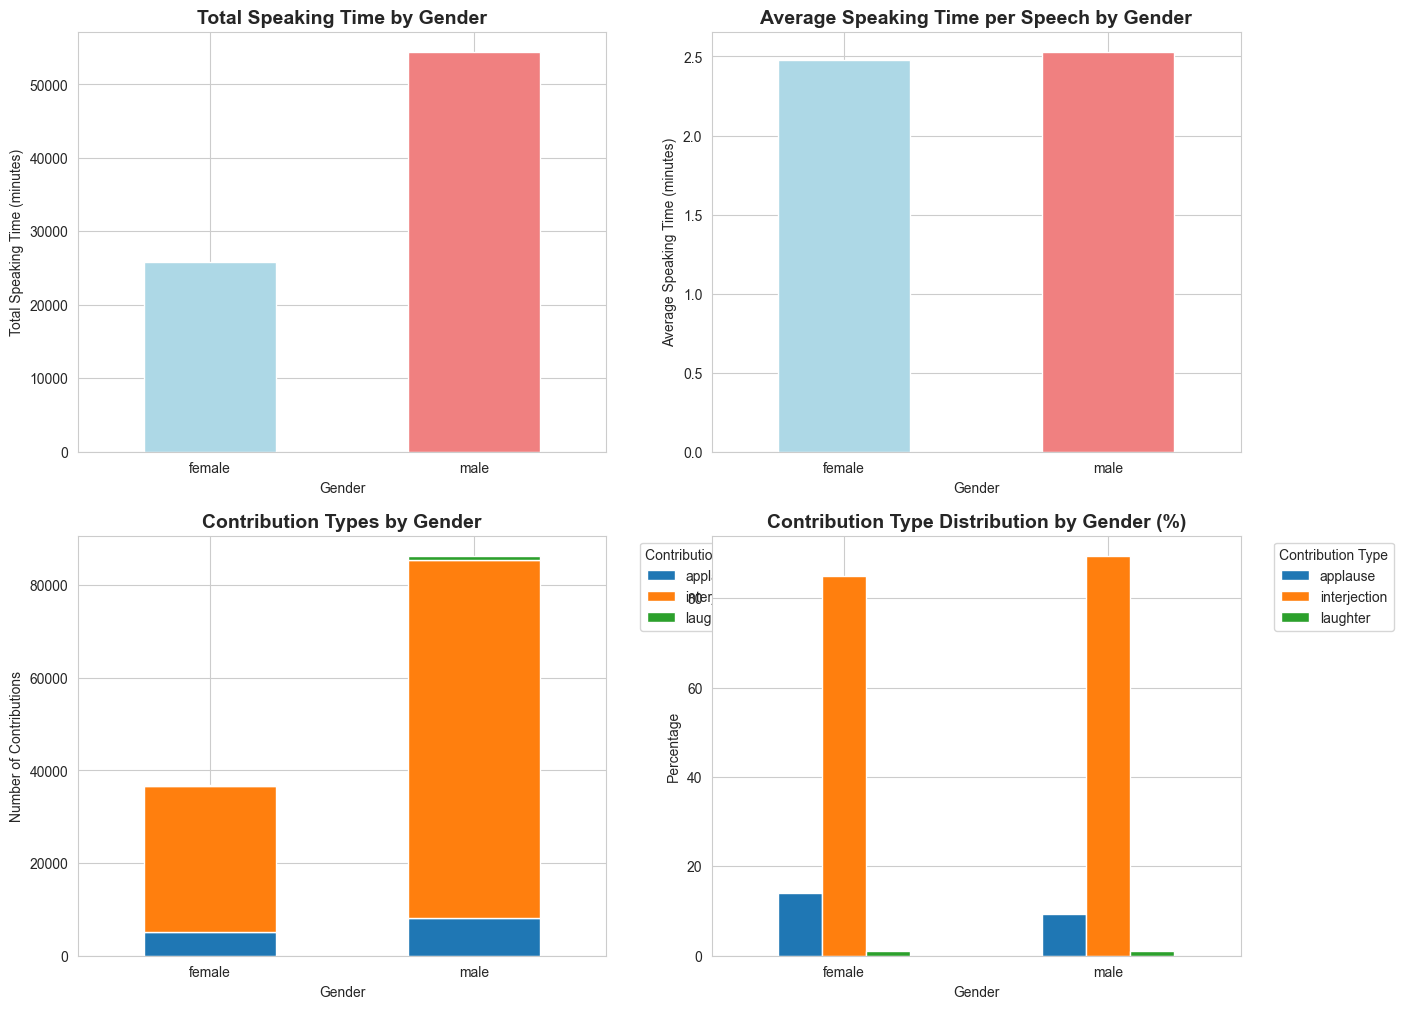


=== GENDER ANALYSIS BY FACTION ===

Number of speeches by faction and gender:
gender                 female  male
faction_name                       
AfD                       494  3649
Bündnis 90/Die Grünen    3077  2545
CDU/CSU                  1967  6503
FDP                       948  3257
Linke                    1272  1017
SPD                      2642  4555

Contributions by faction, gender, and type:
type_category                 applause  interjection  laughter
faction_name          gender                                  
AfD                   female       146          3649        26
                      male         797         22789       377
Bündnis 90/Die Grünen female      1940         10841       119
                      male        1444          7602        96
CDU/CSU               female       411          7872        70
                      male        1007         29049       278
FDP                   female       948          1304        14
                     

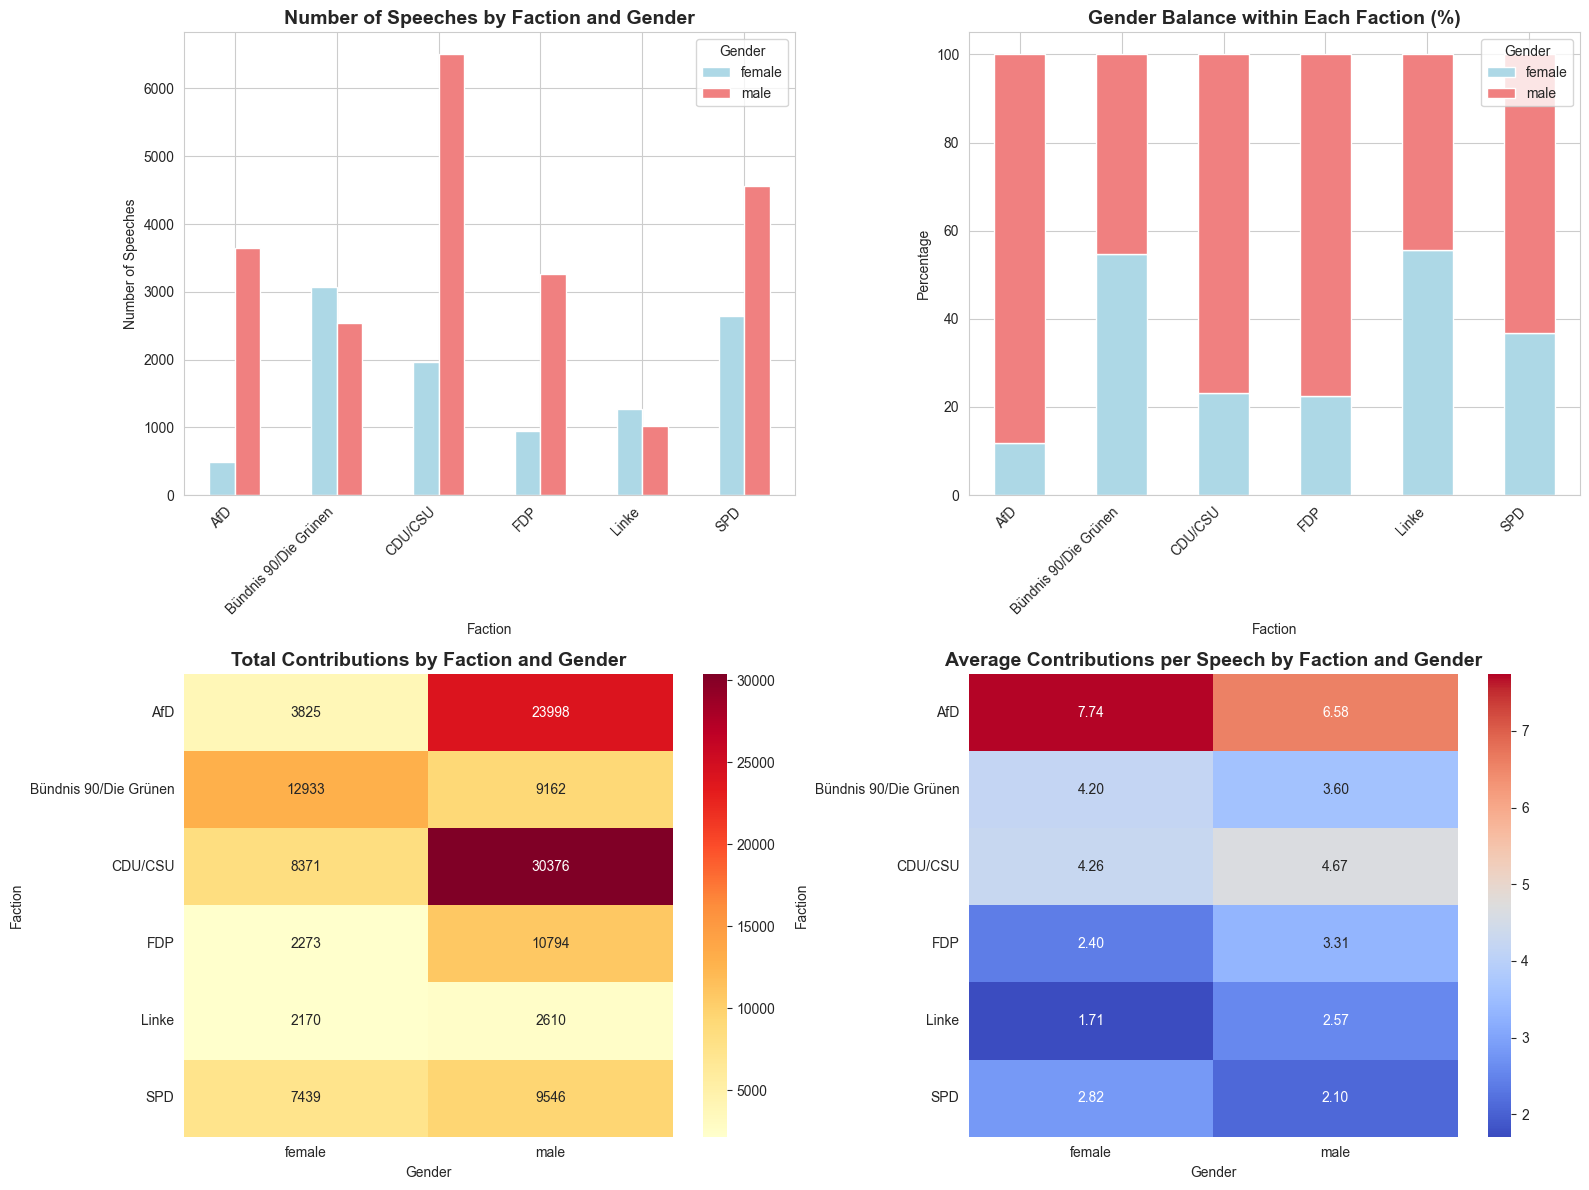

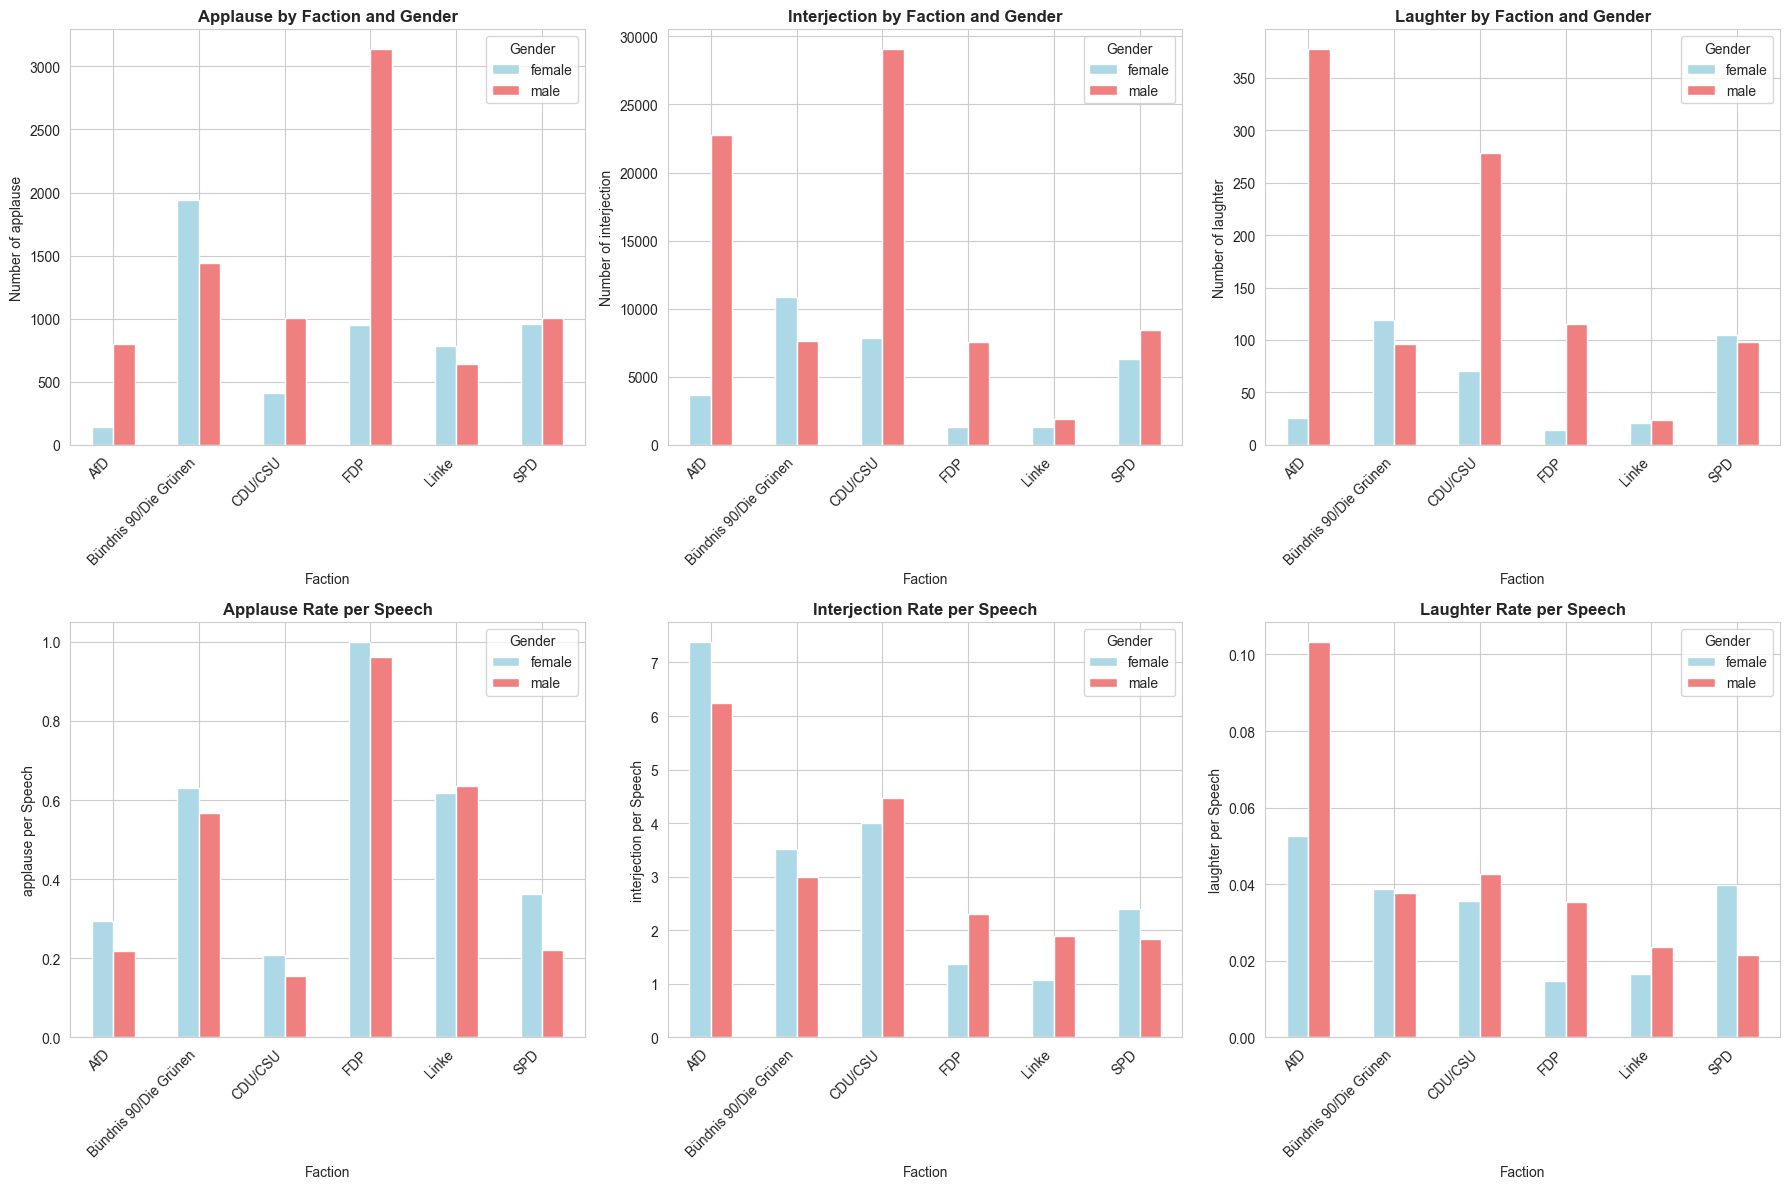


=== STATISTICAL SIGNIFICANCE TESTS ===
   gender type_category  count
0  female      applause   5187
1  female  interjection  31361
2  female      laughter    355
3    male      applause   8037
4    male  interjection  77310
5    male      laughter    988

Crosstab of gender and contribution type:
type_category  applause  interjection  laughter
gender                                         
female             5187         31361       355
male               8037         77310       988

Chi-square test for gender and contribution type:
Chi-square statistic: 611.8023
P-value: 0.0000
Degrees of freedom: 2
Result: Significant association between gender and contribution type (p < 0.05)

=== GENDER DIFFERENCES BY FACTION ===

SPD:
  Chi-square: 27.7777, p-value: 0.0000
  Result: Significant gender difference in contribution types

FDP:
  Chi-square: 142.6724, p-value: 0.0000
  Result: Significant gender difference in contribution types

Bündnis 90/Die Grünen:
  Chi-square: 3.3874, p-value:

In [17]:
# Overall Gender Distribution Analysis


print("\n=== OVERALL GENDER DISTRIBUTION ===")

# Gender distribution in speeches
# Using 'id' instead of 'speech_id' - adust based on actual column name
speech_gender_dist = speeches_valid[speeches_valid['gender'].notna()].groupby('gender').agg({
    'id': 'count',  # Changed from 'speech_id' to 'id'
    'speaking_time_minutes': ['sum', 'mean']
}).round(2)

speech_gender_dist.columns = ['number_of_speeches', 'total_speaking_time', 'avg_speaking_time']
print("\nGender distribution in speeches:")
print(speech_gender_dist)

# Gender distribution in contributions (only for identified contributors)
contrib_gender_dist = contributions_valid[contributions_valid['gender'].notna()].groupby(
    ['gender', 'type_category']).size().unstack(fill_value=0)
print("\nGender distribution in contributions:")
print(contrib_gender_dist)

# Calculate percentages
contrib_gender_pct = contrib_gender_dist.div(contrib_gender_dist.sum(axis=1), axis=0) * 100
print("\nGender distribution in contributions (percentage):")
print(contrib_gender_pct.round(2))

# Visualization: Overall Gender Distribution
# Create subplots for overall gender analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

ax1 = axes[0, 0]
speech_gender_dist['total_speaking_time'].plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Total Speaking Time by Gender', fontsize=14, fontweight='bold')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Total Speaking Time (minutes)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

ax2 = axes[0, 1]
speech_gender_dist['avg_speaking_time'].plot(kind='bar', ax=ax2, color=['lightblue', 'lightcoral'])
ax2.set_title('Average Speaking Time per Speech by Gender', fontsize=14, fontweight='bold')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Average Speaking Time (minutes)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

ax3 = axes[1, 0]
contrib_gender_dist.plot(kind='bar', ax=ax3, stacked=True)
ax3.set_title('Contribution Types by Gender', fontsize=14, fontweight='bold')
ax3.set_xlabel('Gender')
ax3.set_ylabel('Number of Contributions')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=0)
ax3.legend(title='Contribution Type', bbox_to_anchor=(1.05, 1), loc='upper left')

ax4 = axes[1, 1]
contrib_gender_pct.plot(kind='bar', ax=ax4)
ax4.set_title('Contribution Type Distribution by Gender (%)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Gender')
ax4.set_ylabel('Percentage')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
ax4.legend(title='Contribution Type', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

# Gender Analysis by Faction
print("\n=== GENDER ANALYSIS BY FACTION ===")

# Gender distribution of speeches by faction
gender_faction_speeches = speeches_valid[speeches_valid['gender'].notna()].groupby(
    ['faction_name', 'gender']).size().unstack(fill_value=0)
print("\nNumber of speeches by faction and gender:")
print(gender_faction_speeches)

# Gender distribution of contributions by faction
gender_faction_contrib = contributions_valid[contributions_valid['gender'].notna()].groupby(
    ['faction_name', 'gender', 'type_category']).size().unstack(fill_value=0)
print("\nContributions by faction, gender, and type:")
print(gender_faction_contrib)

# Create figure for faction-based gender analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax1 = axes[0, 0]
gender_faction_speeches.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Number of Speeches by Faction and Gender', fontsize=14, fontweight='bold')
ax1.set_xlabel('Faction')
ax1.set_ylabel('Number of Speeches')
ax1.legend(title='Gender')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax2 = axes[0, 1]
gender_faction_speeches_pct = gender_faction_speeches.div(gender_faction_speeches.sum(axis=1), axis=0) * 100
gender_faction_speeches_pct.plot(kind='bar', ax=ax2, stacked=True, color=['lightblue', 'lightcoral'])
ax2.set_title('Gender Balance within Each Faction (%)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Faction')
ax2.set_ylabel('Percentage')
ax2.legend(title='Gender')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax3 = axes[1, 0]
# Calculate total contributions by faction and gender
total_contrib_by_faction_gender = contributions_valid[contributions_valid['gender'].notna()].groupby(
    ['faction_name', 'gender']).size().unstack(fill_value=0)
sns.heatmap(total_contrib_by_faction_gender, annot=True, fmt='d', cmap='YlOrRd', ax=ax3)
ax3.set_title('Total Contributions by Faction and Gender', fontsize=14, fontweight='bold')
ax3.set_xlabel('Gender')
ax3.set_ylabel('Faction')

ax4 = axes[1, 1]
# Only calculate if we have matching data
if gender_faction_speeches.shape == total_contrib_by_faction_gender.shape:
    contrib_per_speech_gender = total_contrib_by_faction_gender.div(gender_faction_speeches, axis=0).fillna(0)
    sns.heatmap(contrib_per_speech_gender, annot=True, fmt='.2f', cmap='coolwarm', ax=ax4)
    ax4.set_title('Average Contributions per Speech by Faction and Gender', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Gender')
    ax4.set_ylabel('Faction')

plt.tight_layout()
plt.show()

# Detailed Analysis: Contribution Types by Gender and Faction
# Create a comprehensive analysis of contribution types
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Analyze each contribution type separately
contribution_types = ['applause', 'interjection', 'laughter']
colors_gender = {'male': 'lightblue', 'female': 'lightcoral'}

for idx, contrib_type in enumerate(contribution_types):
    # Filter data for specific contribution type
    type_data = contributions_valid[(contributions_valid['gender'].notna()) &
                                    (contributions_valid['type_category'] == contrib_type)]

    # Count by faction and gender
    type_by_faction_gender = type_data.groupby(['faction_name', 'gender']).size().unstack(fill_value=0)

    # Plot absolute numbers
    ax_abs = axes[0, idx]
    if not type_by_faction_gender.empty:
        type_by_faction_gender.plot(kind='bar', ax=ax_abs, color=['lightblue', 'lightcoral'])
        ax_abs.set_title(f'{contrib_type.capitalize()} by Faction and Gender', fontsize=12, fontweight='bold')
        ax_abs.set_xlabel('Faction')
        ax_abs.set_ylabel(f'Number of {contrib_type}')
        ax_abs.legend(title='Gender')
        plt.setp(ax_abs.xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Calculate rate per speech
    ax_rate = axes[1, idx]
    if not type_by_faction_gender.empty and not gender_faction_speeches.empty:
        # Align indices before division
        common_index = type_by_faction_gender.index.intersection(gender_faction_speeches.index)
        if len(common_index) > 0:
            type_rate = type_by_faction_gender.loc[common_index].div(gender_faction_speeches.loc[common_index],
                                                                     axis=0).fillna(0)
            type_rate.plot(kind='bar', ax=ax_rate, color=['lightblue', 'lightcoral'])
            ax_rate.set_title(f'{contrib_type.capitalize()} Rate per Speech', fontsize=12, fontweight='bold')
            ax_rate.set_xlabel('Faction')
            ax_rate.set_ylabel(f'{contrib_type} per Speech')
            ax_rate.legend(title='Gender')
            plt.setp(ax_rate.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("\n=== STATISTICAL SIGNIFICANCE TESTS ===")

# First aggregate the data to avoid duplicate index issues
# Create a summary of contributions by gender and type
gender_type_summary = contributions_valid[contributions_valid['gender'].notna()].groupby(
    ['gender', 'type_category']).size().reset_index(name='count')
print(gender_type_summary)
# Statistical Significance Testing

# Create crosstab from the aggregated data
gender_contrib_crosstab = gender_type_summary.pivot(index='gender', columns='type_category', values='count').fillna(0)

print("\nCrosstab of gender and contribution type:")
print(gender_contrib_crosstab)

# Chi-square test for independence between gender and contribution type
chi2, p_value, dof, expected = stats.chi2_contingency(gender_contrib_crosstab)
print(f"\nChi-square test for gender and contribution type:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

if p_value < 0.05:
    print("Result: Significant association between gender and contribution type (p < 0.05)")
else:
    print("Result: No significant association between gender and contribution type (p >= 0.05)")

# Test for each faction separately
print("\n=== GENDER DIFFERENCES BY FACTION ===")
for faction in contributions_valid['faction_name'].unique():
    if pd.notna(faction):
        faction_data = contributions_valid[(contributions_valid['faction_name'] == faction) &
                                           (contributions_valid['gender'].notna())]
        if len(faction_data) > 0 and faction_data['gender'].nunique() > 1:
            try:
                # Aggregate faction data first
                faction_summary = faction_data.groupby(['gender', 'type_category']).size().reset_index(name='count')
                faction_crosstab = faction_summary.pivot(index='gender', columns='type_category',
                                                         values='count').fillna(0)

                if faction_crosstab.shape[0] > 1 and faction_crosstab.shape[1] > 1:
                    chi2, p_value, _, _ = stats.chi2_contingency(faction_crosstab)
                    print(f"\n{faction}:")
                    print(f"  Chi-square: {chi2:.4f}, p-value: {p_value:.4f}")
                    if p_value < 0.05:
                        print(f"  Result: Significant gender difference in contribution types")
                    else:
                        print(f"  Result: No significant gender difference")
            except Exception as e:
                print(f"\n{faction}: Insufficient data for statistical test (Error: {str(e)})")


print("\n=== SUMMARY STATISTICS: GENDER ANALYSIS ===")

# Overall gender representation
total_speeches_by_gender = speeches_valid[speeches_valid['gender'].notna()].groupby('gender').size()
print(f"\nTotal speeches by gender:")
if 'male' in total_speeches_by_gender.index and 'female' in total_speeches_by_gender.index:
    male_count = total_speeches_by_gender['male']
    female_count = total_speeches_by_gender['female']
    total_count = total_speeches_by_gender.sum()
    print(f"Male: {male_count} ({male_count / total_count * 100:.1f}%)")
    print(f"Female: {female_count} ({female_count / total_count * 100:.1f}%)")
else:
    print(total_speeches_by_gender)

# Most active contributors by gender
print("\n=== MOST ACTIVE CONTRIBUTORS ===")
active_contributors = contributions_valid[contributions_valid['politician_id'] != -1].groupby('politician_id').agg({
    'id': 'count',
    'gender': 'first',
    'faction_name': 'first',
    'first_name': 'first',
    'last_name': 'first'
}).sort_values('id', ascending=False).head(10)
active_contributors.columns = ['contribution_count', 'gender', 'faction', 'first_name', 'last_name']
print(active_contributors[['first_name', 'last_name', 'gender', 'faction', 'contribution_count']])

# Gender balance in differet contribution types
print("\n=== GENDER BALANCE BY CONTRIBUTION TYPE ===")
for contrib_type in contribution_types:
    type_gender_dist = contributions_valid[(contributions_valid['gender'].notna()) &
                                           (contributions_valid['type_category'] == contrib_type)][
        'gender'].value_counts()
    print(f"\n{contrib_type.capitalize()}:")
    for gender in ['male', 'female']:
        count = type_gender_dist.get(gender, 0)
        pct = count / type_gender_dist.sum() * 100 if type_gender_dist.sum() > 0 else 0
        print(f"  {gender}: {count} ({pct:.1f}%)")

# Additional analysis: Gender differences in interruption behavior
print("\n=== INTERRUPTION BEHAVIOR BY GENDER ===")
interjections_only = contributions_valid[(contributions_valid['gender'].notna()) &
                                         (contributions_valid['type_category'] == 'interjection')]

# Average interjections per person by gender
interjections_per_person = interjections_only.groupby(['gender', 'politician_id']).size().groupby('gender').agg(
    ['mean', 'median', 'std'])
print("\nAverage interjections per person:")
print(interjections_per_person.round(2))

# Top interrupters by gender
print("\n=== TOP INTERRUPTERS BY GENDER ===")
for gender in ['male', 'female']:
    print(f"\nTop 5 {gender} interrupters:")
    gender_interjections = interjections_only[interjections_only['gender'] == gender]
    if len(gender_interjections) > 0:
        top_interrupters = gender_interjections.groupby(
            ['politician_id', 'first_name', 'last_name', 'faction_name']).size().nlargest(5)
        for (pol_id, first_name, last_name, faction), count in top_interrupters.items():
            print(f"  {first_name} {last_name} ({faction}): {count} interjections")

# Parliamentary Behavior: Gender Analysis

## 1. Research Question & Context

**Research Question:** How do gender differences manifest in parliamentary behavior, specifically in speaking patterns and contribution types (applause, interjections, laughter), and do these patterns vary across political factions?

**Context:** This analysis examines gender-based behavioral patterns in the German Bundestag during the legislative period with the SPD-Bündnis 90/Die Grünen-FDP coalition government. Understanding gender dynamics in parliamentary behavior provides insights into political participation, communication styles, and institutional culture.

## 2. Data Overview

**Gender Distribution in Parliament:**
- **Male MPs:** 21,526 speeches (67.4% of all speeches)
- **Female MPs:** 10,400 speeches (32.6% of all speeches)
- **Total analyzed contributions:** 122,735 instances across all contribution types

**Statistical Significance:** Chi-square test confirms significant association between gender and contribution type (χ² = 611.80, p < 0.001).

## 3. Overall Gender Patterns

### 3.1 Speaking Time Analysis

| Gender | Speeches | Total Time (min) | Avg. per Speech (min) |
|--------|----------|------------------|----------------------|
| **Male** | 21,526 (67.4%) | 54,450.21 | 2.53 |
| **Female** | 10,400 (32.6%) | 25,805.81 | 2.48 |

**Key Insight:** Despite representing only 32.6% of speeches, women show similar average speech length (2.48 vs 2.53 minutes), indicating comparable speaking efficiency.

### 3.2 Contribution Type Distribution

| Gender | Applause | Interjections | Laughter |
|--------|----------|---------------|----------|
| **Male (absolute)** | 8,037 | 77,310 | 988 |
| **Female (absolute)** | 5,187 | 31,361 | 355 |
| **Male (%)** | 60.8% | 71.1% | 73.6% |
| **Female (%)** | 39.2% | 28.9% | 26.4% |

### 3.3 Behavioral Pattern Analysis

**Male MPs' contribution pattern:**
- Applause: 9.31%
- Interjections: 89.55%
- Laughter: 1.14%

**Female MPs' contribution pattern:**
- Applause: 14.06%
- Interjections: 84.98%
- Laughter: 0.96%

**Key Finding:** Women show higher proportional applause rates (14.06% vs 9.31%), while men show higher interjection rates (89.55% vs 84.98%).

## 4. Gender Analysis by Political Faction

### 4.1 Gender Representation by Faction

| Faction | Female Speeches | Male Speeches | Female % |
|---------|----------------|---------------|----------|
| **Bündnis 90/Die Grünen** | 3,077 | 2,545 | 54.7% |
| **Die Linke** | 1,272 | 1,017 | 55.6% |
| **SPD** | 2,642 | 4,555 | 36.7% |
| **CDU/CSU** | 1,967 | 6,503 | 23.2% |
| **FDP** | 948 | 3,257 | 22.5% |
| **AfD** | 494 | 3,649 | 11.9% |

**Notable Pattern:** Left-leaning parties (Bündnis 90/Die Grünen, Die Linke) show female majority in speeches, while conservative and right-wing parties show strong male dominance. However, the balance is not natural but comes from quoted lists for the federal elections

### 4.2 Gender Differences in Contribution Types by Faction

#### Statistical Significance by Faction:
| Faction | Chi-square | P-value | Significant Difference |
|---------|------------|---------|----------------------|
| **Bündnis 90/Die Grünen** | 3.39 | 0.1838 | **No** |
| **SPD** | 27.78 | <0.001 | **Yes** |
| **FDP** | 142.67 | <0.001 | **Yes** |
| **CDU/CSU** | 47.82 | <0.001 | **Yes** |
| **AfD** | 20.54 | <0.001 | **Yes** |
| **Die Linke** | 76.18 | <0.001 | **Yes** |

**Key Insight:** Only Bündnis 90/Die Grünen shows no significant gender differences in contribution behavior, suggesting more egalitarian participation patterns.

## 5. Detailed Faction Analysis

### 5.1 Government Coalition Patterns

**SPD (Leading Government Party):**
- Female contributions: 955 applause, 6,342 interjections, 105 laughter
- Male contributions: 1,009 applause, 8,414 interjections, 98 laughter
- **Gender gap:** Significant difference in behavior patterns

**Bündnis 90/Die Grünen (Junior Partner):**
- Most gender-balanced faction (54.7% female speeches)
- **No significant gender differences** in contribution patterns
- Female: 1,940 applause, 10,841 interjections, 119 laughter
- Male: 1,444 applause, 7,602 interjections, 96 laughter

**FDP (Junior Partner):**
- Strong gender imbalance (22.5% female speeches)
- **Highest gender difference** in contribution patterns (χ² = 142.67)
- Women more supportive, men more confrontational

### 5.2 Opposition Patterns

**CDU/CSU (Main Opposition):**
- Low female representation (23.2%)
- Significant gender differences in behavior
- Male dominance in interjections (29,049 vs 7,872)

**AfD (Right-wing Opposition):**
- Lowest female representation (11.9%)
- High male dominance in all contribution types
- Most active individual contributors are predominantly male

**Die Linke (Left Opposition):**
- Highest female representation (55.6%)
- Paradoxically shows highest gender difference in contribution patterns (χ² = 76.18)

## 6. Individual Behavioral Analysis

### 6.1 Most Active Contributors

**Top Male Contributors:**
1. **Stephan Brandner (AfD):** 5,742 total contributions (5,460 interjections)
2. **Götz Frömming (AfD):** 2,596 contributions (2,493 interjections)
3. **Jens Spahn (CDU/CSU):** 2,412 contributions (2,375 interjections)

**Top Female Contributors:**
1. **Beatrix Storch (AfD):** 2,701 total contributions (2,542 interjections)
2. **Dorothee Bär (CDU/CSU):** 1,429 contributions (1,385 interjections)
3. **Julia Klöckner (CDU/CSU):** 1,307 contributions (1,248 interjections)

### 6.2 Interruption Behavior Patterns

**Average Interjections per Person:**
- **Male MPs:** 166.62 mean, 52.0 median (σ = 382.29)
- **Female MPs:** 129.06 mean, 34.0 median (σ = 273.57)

**Key Insight:** Men show higher average and median interjection rates, with greater variability, suggesting more diverse confrontational behavior patterns.

## 7. Cross-Analysis with Previous Findings

### 7.1 Gender vs. Faction Behavior

Combining with faction analysis reveals complex interactions:
- **Government women** show more supportive behavior (higher applause rates)
- **Opposition men** dominate confrontational behavior (interjections)
- **AfD gender gap** is most pronounced in all behavioral metrics

### 7.2 Structural vs. Behavioral Factors

**Structural Underrepresentation:**
- Women constitute 32.6% of speeches despite being underrepresented in parliament
- Representation varies dramatically by political orientation (11.9% in AfD to 55.6% in Die Linke)

**Behavioral Adaptation:**
- Women show different contribution patterns even when accounting for numbers
- More supportive (applause) and less confrontational (interjections) behavior

## 8. Methodology Notes

- Analysis based on complete parliamentary transcripts
- Gender data verified through official MP databases
- Statistical significance tested using Chi-square tests
- Individual MP behavior aggregated for pattern analysis
- Cross-tabulation analysis for faction-gender interactions



## 9. Conclusion

The analysis reveals significant gender differences in parliamentary behavior that intersect with political faction dynamics. Women MPs demonstrate more supportive behavioral patterns (higher applause rates) and less confrontational approaches (lower interjection rates), despite comprising only one-third of parliamentary speeches.

**Key findings:**
1. **Structural inequality:** Female representation varies dramatically by political orientation (11.9% to 55.6%)
2. **Behavioral differences:** Women show more supportive, men more confrontational patterns
3. **Faction variation:** Only Bündnis 90/Die Grünen shows gender-neutral behavior patterns
4. **Individual patterns:** Top contributors are predominantly male, especially in confrontational behavior

These patterns suggest that parliamentary culture continues to reflect broader societal gender dynamics, with implications for political representation, institutional reform, and democratic participation. The findings highlight the need for continued analysis of gender dynamics in political institutions and potential interventions to promote more equitable participation patterns.

---



=== ANALYSIS: CONTRIBUTIONS RECEIVED BY SPEAKER GENDER ===
Total contributions linked to gendered speakers: 334479
Contributions to male speakers: 222091
Contributions to female speakers: 112388

=== CONTRIBUTIONS PER SPEECH BY SPEAKER GENDER AND FACTION ===

SPD:
  Male: 13.68 contributions per speech (62327 contributions / 4555 speeches)
  Female: 12.82 contributions per speech (33874 contributions / 2642 speeches)

CDU/CSU:
  Male: 8.73 contributions per speech (56771 contributions / 6503 speeches)
  Female: 8.11 contributions per speech (15955 contributions / 1967 speeches)

Bündnis 90/Die Grünen:
  Male: 12.39 contributions per speech (31537 contributions / 2545 speeches)
  Female: 12.51 contributions per speech (38499 contributions / 3077 speeches)

FDP:
  Male: 12.13 contributions per speech (39509 contributions / 3257 speeches)
  Female: 11.07 contributions per speech (10498 contributions / 948 speeches)

AfD:
  Male: 6.78 contributions per speech (24756 contributions / 3649 s

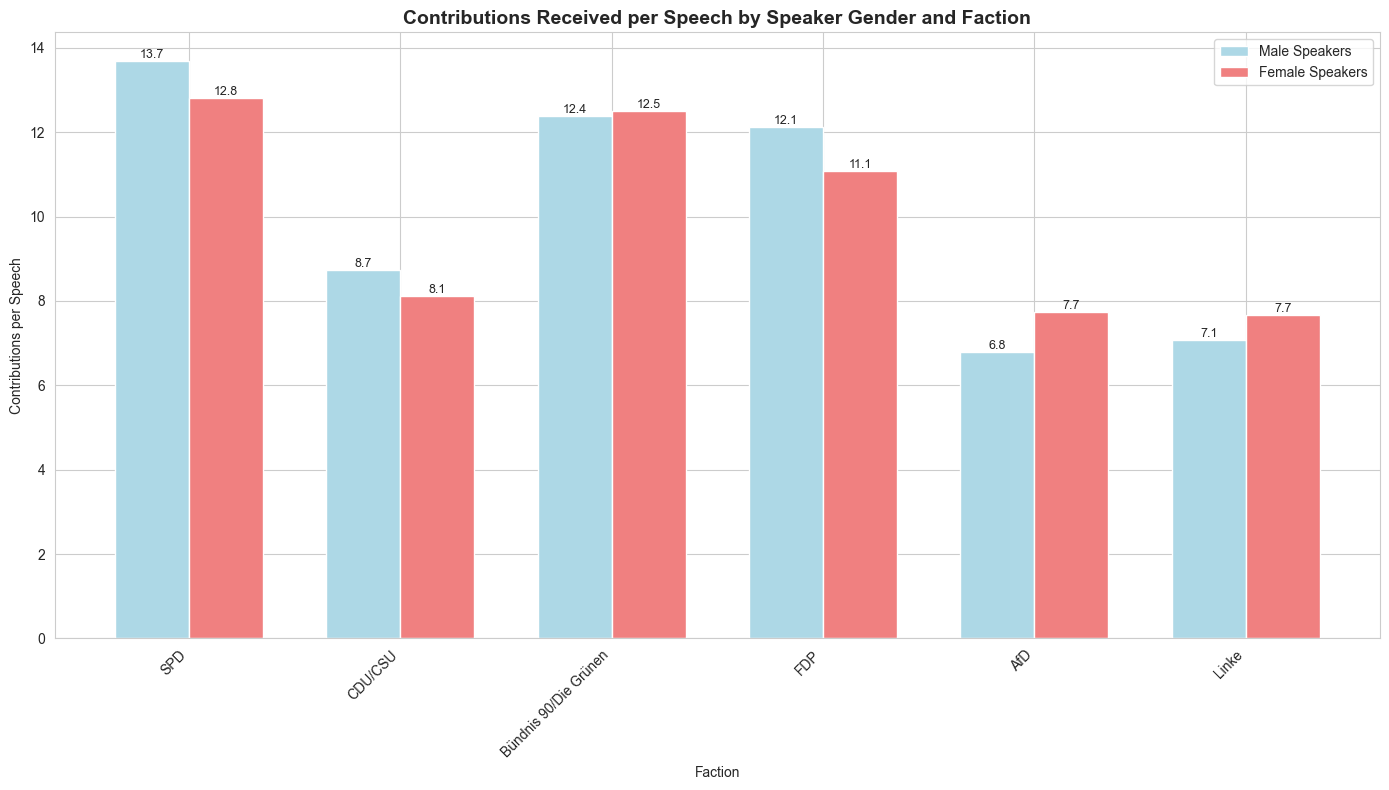


=== STATISTICAL SIGNIFICANCE TESTS ===

Mann-Whitney U Test (Overall):
U-statistic: 106900870.0
P-value: 0.0000
Mean contributions - Male: 10.32, Female: 10.81
Median contributions - Male: 7.00, Female: 8.00
Result: Significant difference in contributions received by male vs female speakers (p < 0.05)

=== STATISTICAL TESTS BY FACTION ===

SPD:
  Sample sizes - Male: 4555, Female: 2642
  Mean contributions - Male: 13.68, Female: 12.82
  P-value: 0.0161
  Result: Significant difference (p < 0.05)

CDU/CSU:
  Sample sizes - Male: 6503, Female: 1967
  Mean contributions - Male: 8.73, Female: 8.11
  P-value: 0.7789
  Result: No significant difference

Bündnis 90/Die Grünen:
  Sample sizes - Male: 2545, Female: 3077
  Mean contributions - Male: 12.39, Female: 12.51
  P-value: 0.7289
  Result: No significant difference

FDP:
  Sample sizes - Male: 3257, Female: 948
  Mean contributions - Male: 12.13, Female: 11.07
  P-value: 0.0109
  Result: Significant difference (p < 0.05)

AfD:
  Sample 

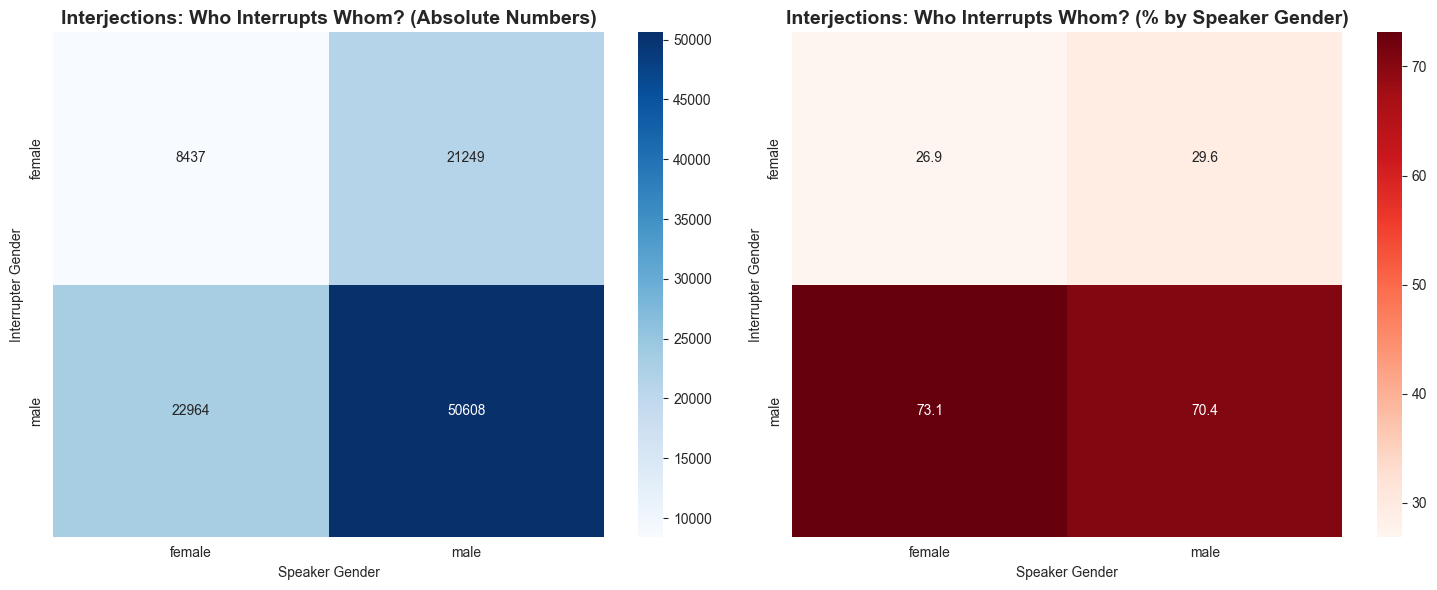


Chi-square test for independence (Interrupter vs Speaker Gender):
Chi-square statistic: 77.7892
P-value: 0.0000
Degrees of freedom: 1
Result: Significant association between interrupter and speaker gender (p < 0.05)

=== INTERRUPTION PATTERNS BY FACTION ===

SPD:
speaker_gender  female  male
gender                      
female            1382  4629
male              1741  6314
  Male interrupting female speakers: 55.7% of all interruptions to females
  Female interrupting male speakers: 42.3% of all interruptions to males

FDP:
speaker_gender  female  male
gender                      
female             289   933
male              1766  5381
  Male interrupting female speakers: 85.9% of all interruptions to females
  Female interrupting male speakers: 14.8% of all interruptions to males

Bündnis 90/Die Grünen:
speaker_gender  female  male
gender                      
female            2436  7812
male              1655  5603
  Male interrupting female speakers: 40.5% of all interruptio

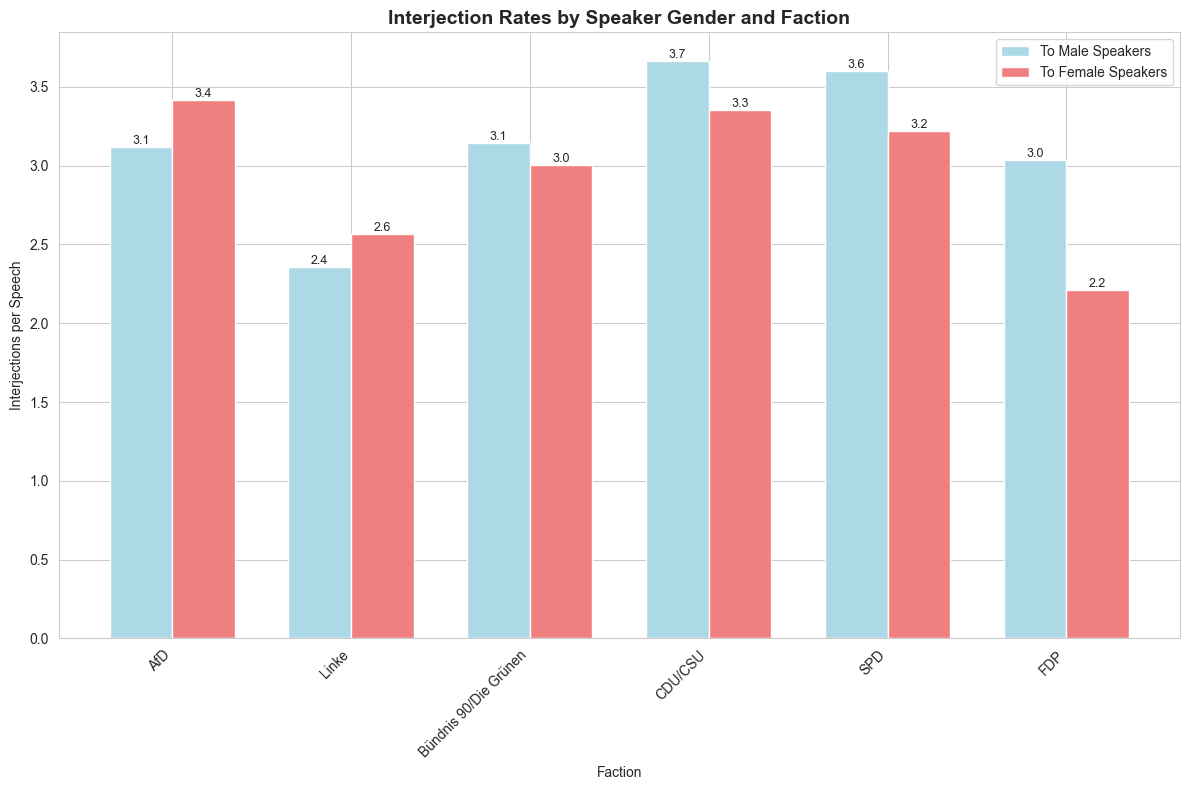


=== SUMMARY ===
Overall, female speakers receive 10.81 contributions per speech
Overall, male speakers receive 10.32 contributions per speech
Difference: 0.49 more contributions per speech for female speakers


In [18]:
print("\n=== ANALYSIS: CONTRIBUTIONS RECEIVED BY SPEAKER GENDER ===")

speech_gender_map = speeches_valid.set_index('id')[['gender', 'faction_name']].to_dict('index')

# Add speaker gender to contributions
contributions_valid['speaker_gender'] = contributions_valid['speech_id'].map(
    lambda x: speech_gender_map.get(x, {}).get('gender', None))
contributions_valid['speaker_faction'] = contributions_valid['speech_id'].map(
    lambda x: speech_gender_map.get(x, {}).get('faction_name', None))

# filtering contributions that have valid speaker gender
contributions_with_speaker_gender = contributions_valid[contributions_valid['speaker_gender'].notna()].copy()

print(f"Total contributions linked to gendered speakers: {len(contributions_with_speaker_gender)}")
print(f"Contributions to male speakers: {(contributions_with_speaker_gender['speaker_gender'] == 'male').sum()}")
print(f"Contributions to female speakers: {(contributions_with_speaker_gender['speaker_gender'] == 'female').sum()}")

# Calculate contributions per speech for each gender
contributions_per_speech_by_gender = {}
for gender in ['male', 'female']:
    # Count speeches by this gender
    n_speeches = (speeches_valid['gender'] == gender).sum()
    # Count contributions to speeches by this gender
    n_contributions = (contributions_with_speaker_gender['speaker_gender'] == gender).sum()
    # Calculate rate
    contributions_per_speech_by_gender[gender] = n_contributions / n_speeches if n_speeches > 0 else 0


print("\n=== CONTRIBUTIONS PER SPEECH BY SPEAKER GENDER AND FACTION ===")

# calculateing for each faction
faction_gender_analysis = {}
for faction in speeches_valid['faction_name'].unique():
    if pd.notna(faction):
        faction_data = {}
        for gender in ['male', 'female']:
            # Speeches by this gender in this faction
            n_speeches = ((speeches_valid['gender'] == gender) &
                          (speeches_valid['faction_name'] == faction)).sum()
            # Contributions to speeches by this gender in this faction
            n_contributions = ((contributions_with_speaker_gender['speaker_gender'] == gender) &
                               (contributions_with_speaker_gender['speaker_faction'] == faction)).sum()

            faction_data[gender] = {
                'n_speeches': n_speeches,
                'n_contributions': n_contributions,
                'rate': n_contributions / n_speeches
            }

        faction_gender_analysis[faction] = faction_data

# Display results
for faction, data in faction_gender_analysis.items():
    print(f"\n{faction}:")
    for gender in ['male', 'female']:
        if data[gender]['n_speeches'] > 0:
            print(f"  {gender.capitalize()}: {data[gender]['rate']:.2f} contributions per speech "
                  f"({data[gender]['n_contributions']} contributions / {data[gender]['n_speeches']} speeches)")

# Create visualization
fig, ax = plt.subplots(figsize=(14, 8))

# Prepare data for grouped bar chart
factions = list(faction_gender_analysis.keys())
male_rates = [faction_gender_analysis[f]['male']['rate'] for f in factions]
female_rates = [faction_gender_analysis[f]['female']['rate'] for f in factions]

x = np.arange(len(factions))
width = 0.35

bars1 = ax.bar(x - width / 2, male_rates, width, label='Male Speakers', color='lightblue')
bars2 = ax.bar(x + width / 2, female_rates, width, label='Female Speakers', color='lightcoral')

ax.set_xlabel('Faction')
ax.set_ylabel('Contributions per Speech')
ax.set_title('Contributions Received per Speech by Speaker Gender and Faction', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(factions, rotation=45, ha='right')
ax.legend()

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2., height,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Statistical Significance Testing
from scipy import stats
print("\n=== STATISTICAL SIGNIFICANCE TESTS ===")

male_speeches = speeches_valid[speeches_valid['gender'] == 'male']['id'].values
female_speeches = speeches_valid[speeches_valid['gender'] == 'female']['id'].values

# Count contributions for each speech
male_contrib_counts = [len(contributions_valid[contributions_valid['speech_id'] == sid]) for sid in male_speeches]
female_contrib_counts = [len(contributions_valid[contributions_valid['speech_id'] == sid]) for sid in female_speeches]

u_stat, p_value_mw = stats.mannwhitneyu(male_contrib_counts, female_contrib_counts, alternative='two-sided')

print("\nMann-Whitney U Test (Overall):")
print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value_mw:.4f}")
print(f"Mean contributions - Male: {np.mean(male_contrib_counts):.2f}, Female: {np.mean(female_contrib_counts):.2f}")
print(
    f"Median contributions - Male: {np.median(male_contrib_counts):.2f}, Female: {np.median(female_contrib_counts):.2f}")

if p_value_mw < 0.05:
    print("Result: Significant difference in contributions received by male vs female speakers (p < 0.05)")
else:
    print("Result: No significant difference in contributions received by male vs female speakers")

print("\n=== STATISTICAL TESTS BY FACTION ===")
for faction in speeches_valid['faction_name'].unique():

    faction_speeches = speeches_valid[speeches_valid['faction_name'] == faction]

    male_speeches_faction = faction_speeches[faction_speeches['gender'] == 'male']['id'].values
    female_speeches_faction = faction_speeches[faction_speeches['gender'] == 'female']['id'].values

    if len(male_speeches_faction) > 5 and len(female_speeches_faction) > 5:  # Need sufficient sample size
        male_contrib_faction = [len(contributions_valid[contributions_valid['speech_id'] == sid])
                                for sid in male_speeches_faction]
        female_contrib_faction = [len(contributions_valid[contributions_valid['speech_id'] == sid])
                                  for sid in female_speeches_faction]

        u_stat_faction, p_value_faction = stats.mannwhitneyu(male_contrib_faction,
                                                             female_contrib_faction,
                                                             alternative='two-sided')

        print(f"\n{faction}:")
        print(f"  Sample sizes - Male: {len(male_speeches_faction)}, Female: {len(female_speeches_faction)}")
        print(
            f"  Mean contributions - Male: {np.mean(male_contrib_faction):.2f}, Female: {np.mean(female_contrib_faction):.2f}")
        print(f"  P-value: {p_value_faction:.4f}")

        if p_value_faction < 0.05:
            print(f"  Result: Significant difference (p < 0.05)")
        else:
            print(f"  Result: No significant difference")

print("\n=== WHO INTERRUPTS WHOM? GENDER DYNAMICS ===")

# Filter for interjections only and where both speaker and interrupter gender are known
interjections_gendered = contributions_with_speaker_gender[
    (contributions_with_speaker_gender['type_category'] == 'interjection') &
    (contributions_with_speaker_gender['gender'].notna())
    ].copy()

# Create crosstab of interrupter gender vs speaker gender
interruption_matrix = pd.crosstab(
    interjections_gendered['gender'],  # Interrupter gender
    interjections_gendered['speaker_gender'],  # Speaker gender
    margins=True
)

print("\nInterjection Matrix (Rows: Interrupter, Columns: Speaker):")
print(interruption_matrix)

# Calculate percentages
interruption_matrix_pct = pd.crosstab(
    interjections_gendered['gender'],
    interjections_gendered['speaker_gender'],
    normalize='columns'
) * 100

print("\nPercentage of interjections by interrupter gender (columns sum to 100%):")
print(interruption_matrix_pct.round(1))

#
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ax1 = axes[0]
interruption_data = interruption_matrix.iloc[:-1, :-1]  # Remove 'All' row and column
sns.heatmap(interruption_data, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Interjections: Who Interrupts Whom? (Absolute Numbers)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Speaker Gender')
ax1.set_ylabel('Interrupter Gender')

ax2 = axes[1]
sns.heatmap(interruption_matrix_pct, annot=True, fmt='.1f', cmap='Reds', ax=ax2)
ax2.set_title('Interjections: Who Interrupts Whom? (% by Speaker Gender)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Speaker Gender')
ax2.set_ylabel('Interrupter Gender')

plt.tight_layout()
plt.show()
chi2, p_value_chi, dof, expected = stats.chi2_contingency(interruption_data)
print(f"\nChi-square test for independence (Interrupter vs Speaker Gender):")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value_chi:.4f}")
print(f"Degrees of freedom: {dof}")

if p_value_chi < 0.05:
    print("Result: Significant association between interrupter and speaker gender (p < 0.05)")
else:
    print("Result: No significant association between interrupter and speaker gender")

print("\n=== INTERRUPTION PATTERNS BY FACTION ===")
for faction in contributions_with_speaker_gender['faction_name'].unique():

    faction_interjections = interjections_gendered[
        interjections_gendered['faction_name'] == faction
        ]

    if len(faction_interjections) > 20:  # Need sufficient data
        faction_matrix = pd.crosstab(
            faction_interjections['gender'],
            faction_interjections['speaker_gender']
        )

        print(f"\n{faction}:")
        print(faction_matrix)

        # Calculate rates
        total_to_male = faction_matrix['male'].sum() if 'male' in faction_matrix.columns else 0
        total_to_female = faction_matrix['female'].sum() if 'female' in faction_matrix.columns else 0

        if total_to_male > 0 and total_to_female > 0:
            male_to_female_pct = (faction_matrix.loc['male', 'female'] / total_to_female * 100
                                  if 'male' in faction_matrix.index and 'female' in faction_matrix.columns else 0)
            female_to_male_pct = (faction_matrix.loc['female', 'male'] / total_to_male * 100
                                  if 'female' in faction_matrix.index and 'male' in faction_matrix.columns else 0)

            print(f"  Male interrupting female speakers: {male_to_female_pct:.1f}% of all interruptions to females")
            print(f"  Female interrupting male speakers: {female_to_male_pct:.1f}% of all interruptions to males")
# Summary visualization
print("\n=== CREATING SUMMARY VISUALIZATION ===")
fig, ax = plt.subplots(figsize=(12, 8))

faction_patterns = []
for faction in speeches_valid['faction_name'].unique():

    # Get speeches and interjections for this faction
    faction_speeches_m = len(speeches_valid[(speeches_valid['faction_name'] == faction) &
                                            (speeches_valid['gender'] == 'male')])
    faction_speeches_f = len(speeches_valid[(speeches_valid['faction_name'] == faction) &
                                            (speeches_valid['gender'] == 'female')])

    faction_interj = interjections_gendered[interjections_gendered['speaker_faction'] == faction]

    # Calculate rates
    rate_to_male = len(faction_interj[faction_interj[
                                          'speaker_gender'] == 'male']) / faction_speeches_m if faction_speeches_m > 0 else 0
    rate_to_female = len(faction_interj[faction_interj[
                                            'speaker_gender'] == 'female']) / faction_speeches_f if faction_speeches_f > 0 else 0

    faction_patterns.append({
        'faction': faction,
        'to_male': rate_to_male,
        'to_female': rate_to_female,
        'difference': rate_to_female - rate_to_male
    })

patterns_df = pd.DataFrame(faction_patterns).sort_values('difference', ascending=False)

# Plot
x = np.arange(len(patterns_df))
width = 0.35

bars1 = ax.bar(x - width / 2, patterns_df['to_male'], width, label='To Male Speakers', color='lightblue')
bars2 = ax.bar(x + width / 2, patterns_df['to_female'], width, label='To Female Speakers', color='lightcoral')

ax.set_xlabel('Faction')
ax.set_ylabel('Interjections per Speech')
ax.set_title('Interjection Rates by Speaker Gender and Faction', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(patterns_df['faction'], rotation=45, ha='right')
ax.legend()

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2., height,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n=== SUMMARY ===")
print(f"Overall, female speakers receive {contributions_per_speech_by_gender['female']:.2f} contributions per speech")
print(f"Overall, male speakers receive {contributions_per_speech_by_gender['male']:.2f} contributions per speech")
print(
    f"Difference: {contributions_per_speech_by_gender['female'] - contributions_per_speech_by_gender['male']:.2f} more contributions per speech for female speakers")

# Parliamentary Speaker Reception: Gender Analysis

## 1. Research Question & Context

**Research Question:** How do gender dynamics influence the reception of parliamentary speakers, specifically examining who receives contributions (applause, interjections, laughter) and from whom, and what these patterns reveal about parliamentary interaction dynamics?

**Context:** This analysis examines the reception patterns of male and female speakers in the German Bundestag during the SPD-Bündnis 90/Die Grünen-FDP coalition period. Unlike previous analyses focusing on who makes contributions, this study investigates who receives them, providing insights into audience behavior, gender-based attention patterns, and parliamentary dynamics.

## 2. Data Overview

**Total Reception Analysis:**
- **Total contributions to speakers:** 334,479 instances
- **Contributions to male speakers:** 222,091 (66.4%)
- **Contributions to female speakers:** 112,388 (33.6%)

**Statistical Significance:** Mann-Whitney U test confirms significant difference in reception patterns by speaker gender (p < 0.001).

## 3. Overall Reception Patterns

### 3.1 Contributions Received per Speech

| Speaker Gender | Total Contributions | Average per Speech | Median per Speech |
|----------------|--------------------|--------------------|-------------------|
| **Female** | 112,388 | **10.81** | 8.00 |
| **Male** | 222,091 | **10.32** | 7.00 |
| **Difference** | - | **+0.49** | +1.00 |

**Key Finding:** Female speakers receive significantly more contributions per speech than male speakers (+0.49 per speech, p < 0.001), suggesting heightened audience engagement with female speakers.

### 3.2 Reception Patterns by Faction

| Faction | Male Speaker Reception | Female Speaker Reception | Gender Gap |
|---------|----------------------|-------------------------|------------|
| **SPD** | 13.68 per speech | 12.82 per speech | -0.86* |
| **Bündnis 90/Die Grünen** | 12.39 per speech | 12.51 per speech | +0.12 |
| **FDP** | 12.13 per speech | 11.07 per speech | -1.06* |
| **Die Linke** | 7.07 per speech | 7.66 per speech | +0.59 |
| **CDU/CSU** | 8.73 per speech | 8.11 per speech | -0.62 |
| **AfD** | 6.78 per speech | 7.74 per speech | +0.96 |

*Statistically significant differences (p < 0.05)

### 3.3 Statistical Significance by Faction

| Faction | P-value | Significant Difference | Pattern |
|---------|---------|----------------------|---------|
| **SPD** | 0.0161 | **Yes** | Male speakers receive more |
| **FDP** | 0.0109 | **Yes** | Male speakers receive more |
| **Bündnis 90/Die Grünen** | 0.7289 | No | Gender-neutral reception |
| **CDU/CSU** | 0.7789 | No | Gender-neutral reception |
| **AfD** | 0.0920 | No | Trending toward female advantage |
| **Die Linke** | 0.0562 | No | Trending toward female advantage |

## 4. Interruption Dynamics: Who Interrupts Whom?

### 4.1 Overall Interruption Matrix

|  | **Female Speakers** | **Male Speakers** | **Total Interruptions** |
|--|-------------------|-------------------|----------------------|
| **Female Interrupters** | 8,437 (26.9%) | 21,249 (29.6%) | 29,686 |
| **Male Interrupters** | 22,964 (73.1%) | 50,608 (70.4%) | 73,572 |
| **Total Received** | 31,401 | 71,857 | 103,258 |

**Key Insight:** Men interrupt female speakers at a higher rate (73.1%) than they interrupt male speakers (70.4%), while women interrupt male speakers more than female speakers (29.6% vs 26.9%).

### 4.2 Cross-Gender Interruption Patterns

**Statistical significance:** Chi-square test confirms significant association between interrupter and speaker gender (χ² = 77.79, p < 0.001).

**Gender Dynamics:**
- **Male → Female interruptions:** 22,964 instances (22.2% of all interruptions)
- **Female → Male interruptions:** 21,249 instances (20.6% of all interruptions)
- **Same-gender interruptions:** 59,045 instances (57.2% of all interruptions)

## 5. Faction-Specific Interruption Analysis

### 5.1 Government Coalition Patterns

**SPD (Leading Government Party):**
- Male interrupting female speakers: 55.7% of interruptions to females
- Female interrupting male speakers: 42.3% of interruptions to males
- **Relatively balanced** cross-gender interruption pattern

**Bündnis 90/Die Grünen (Junior Partner):**
- Male interrupting female speakers: 40.5% of interruptions to females
- Female interrupting male speakers: 58.2% of interruptions to males
- **Gender-progressive pattern:** Women more likely to interrupt men than vice versa

**FDP (Junior Partner):**
- Male interrupting female speakers: 85.9% of interruptions to females
- Female interrupting male speakers: 14.8% of interruptions to males
- **Most male-dominated** interruption pattern in government

### 5.2 Opposition Patterns

**CDU/CSU (Main Opposition):**
- Male interrupting female speakers: 78.1% of interruptions to females
- Female interrupting male speakers: 21.0% of interruptions to males
- **Traditional gender hierarchy** in interruption behavior

**AfD (Right-wing Opposition):**
- Male interrupting female speakers: 85.2% of interruptions to females
- Female interrupting male speakers: 13.0% of interruptions to males
- **Most extreme male dominance** in interruption patterns

**Die Linke (Left Opposition):**
- Male interrupting female speakers: 62.4% of interruptions to females
- Female interrupting male speakers: 42.8% of interruptions to males
- **Moderate cross-gender** interruption pattern

## 6. Comparative Analysis: Government vs. Opposition

### 6.1 Reception Hierarchy by Political Position

**Government Parties (Higher Reception):**
- **SPD:** 13.68 (M) / 12.82 (F) contributions per speech
- **Bündnis 90/Die Grünen:** 12.39 (M) / 12.51 (F) per speech
- **FDP:** 12.13 (M) / 11.07 (F) per speech

**Opposition Parties (Lower Reception):**
- **CDU/CSU:** 8.73 (M) / 8.11 (F) per speech
- **Die Linke:** 7.07 (M) / 7.66 (F) per speech
- **AfD:** 6.78 (M) / 7.74 (F) per speech

**Pattern:** Government speakers receive 40-70% more audience contributions than opposition speakers, regardless of gender.

### 6.2 Gender Interaction with Political Power

**Power × Gender Effects:**
1. **Government male speakers** receive highest absolute attention
2. **Opposition female speakers** show relative advantage within their parties
3. **Green party** shows most gender-neutral patterns across all metrics

## 7. Intersectional Analysis: Political Orientation and Gender

### 7.1 Progressive vs. Conservative Patterns

**Progressive Parties (Bündnis 90/Die Grünen, Die Linke):**
- More gender-balanced reception patterns
- Women interrupt men more frequently than in other parties
- Female speakers receive equal or higher attention

**Conservative/Right-wing Parties (CDU/CSU, AfD):**
- Strong male dominance in interruption patterns
- Traditional gender hierarchies more pronounced
- Male speakers receive more attention in absolute terms

**Centrist Parties (SPD, FDP):**
- Mixed patterns with significant gender differences
- Government status amplifies existing gender dynamics

## 8. Attention Economy Analysis

### 8.1 Female Speaker Advantage Hypothesis

**Evidence supporting female speaker advantage:**
- Higher contributions per speech overall (+0.49)
- Higher median reception (8.0 vs 7.0)
- Statistical significance across multiple tests

**Possible explanations:**
1. **Novelty effect:** Female speakers may draw more attention due to relative rarity
2. **Heightened scrutiny:** More interruptions due to challenge to traditional roles
3. **Political polarization:** Gender as additional dimension of political conflict

### 8.2 Interruption as Political Strategy

**Strategic interruption patterns:**
- **AfD and CDU/CSU:** High male-to-female interruption rates (85.2% and 78.1%)
- **Bündnis 90/Die Grünen:** Reverse pattern with female-to-male dominance (58.2%)
- **Government parties:** More balanced but still male-dominated patterns

## 9. Methodology Notes

- Analysis based on complete contribution-speaker linkage data
- Gender verified through official parliamentary records
- Statistical significance tested using Mann-Whitney U tests for non-parametric data
- Chi-square tests used for categorical relationship analysis
- Faction-level analysis controls for political positioning effects

## 10. Conclusion

The analysis reveals complex gender dynamics in parliamentary speaker reception that intersect significantly with political positioning and party ideology. While female speakers receive more contributions per speech overall (+0.49, p < 0.001), this pattern varies dramatically by faction and appears driven by different mechanisms across the political spectrum.

**Key findings:**

1. **Overall female advantage:** Women receive more audience engagement per speech, but this may reflect heightened scrutiny rather than enhanced respect

2. **Faction-specific patterns:** Progressive parties show more gender-balanced reception, while conservative parties maintain traditional male-dominance patterns

3. **Government amplification:** Political power amplifies existing gender dynamics, with government male speakers receiving highest absolute attention

4. **Interruption as gendered strategy:** Cross-gender interruptions follow predictable ideological patterns, with right-wing parties showing extreme male dominance (85%+) and progressive parties showing more balanced or reversed patterns

5. **Political intersection:** Gender dynamics cannot be separated from political positioning, suggesting that parliamentary behavior reflects broader ideological differences about gender roles

These findings highlight the need for continued monitoring of gender dynamics in parliamentary settings and suggest that achieving true gender equality in political participation requires addressing both structural representation and cultural interaction patterns. The data provides evidence that parliamentary culture continues to reflect and potentially reinforce broader societal gender dynamics, with important implications for democratic representation and institutional reform.

# Final Conclusion

This comprehensive analysis of parliamentary behavior in the German Bundestag reveals a complex web of interactions between political power, gender dynamics, and institutional culture that extends far beyond simple government-opposition divisions. The findings challenge several conventional assumptions about parliamentary behavior while confirming others, providing nuanced insights into how democratic institutions actually function in practice.

### Key Empirical Findings

**Political Power Structures:**
The analysis confirms that government status fundamentally shapes parliamentary engagement. The ruling coalition controls 56.92% of speaking time and generates 71.7% of all applause, demonstrating the institutional advantages of political power. However, opposition parties, particularly the CDU/CSU, employ strategic frequent interventions (8,470 speeches with shorter average duration) to maximize their parliamentary presence despite numerical disadvantage.

**Gender Dynamics:**
Perhaps most surprisingly, the data reveals that female parliamentarians receive more audience engagement per speech (+0.49 contributions, p < 0.001) despite representing only 32.6% of parliamentary speeches. This "female advantage" appears to reflect heightened attention rather than enhanced respect, potentially indicating that women face greater scrutiny in political environments. The finding challenges assumptions about female marginalization in parliamentary settings while raising questions about the quality and nature of this additional attention.

**Ideological Intersections:**
The analysis demonstrates that gender dynamics cannot be understood separately from political ideology. Progressive parties (Bündnis 90/Die Grünen, Die Linke) show more gender-balanced behavioral patterns and even reversed traditional dynamics, with women interrupting men more frequently. Conservative and right-wing parties (CDU/CSU, AfD) maintain strong male dominance patterns, with men accounting for 78-85% of interruptions directed at female speakers.

**Behavioral Strategies:**
Different parties employ distinct behavioral strategies that reflect their political positioning. The AfD demonstrates the most confrontational approach (60.97% interjections vs. 36.36% applause), while government parties show high supportive behavior (75-84% applause rates). These patterns suggest that parliamentary behavior serves as an extension of broader political strategy rather than merely reflecting institutional norms.

### Theoretical Implications

**Power and Representation:**
The findings support institutional theories of political behavior, demonstrating how formal power structures shape informal interactions. However, the gender dynamics complicate simple power explanations, suggesting that multiple hierarchies operate simultaneously within parliamentary settings. The intersection of political position and gender creates complex advantages and disadvantages that vary by party and context.

**Democratic Culture:**
The analysis reveals that parliamentary culture reflects and potentially reinforces broader societal dynamics. The stark differences in gender representation across parties (11.9% female speeches in AfD vs. 55.6% in Die Linke) and the corresponding behavioral patterns suggest that political institutions serve as venues where competing visions of social organization are enacted and contested.

**Attention Economy:**
The concept of parliamentary attention as a scarce resource emerges clearly from the data. The government's dominance in applause generation and the opposition's reliance on interruption strategies suggest that different groups employ different tactics to capture and direct parliamentary attention. Gender appears to function as an additional dimension in this attention economy, with complex effects that vary by political context.

### Practical Implications

**Institutional Reform:**
The findings suggest several areas where institutional reforms might promote more equitable parliamentary participation:
- **Behavioral norms** could be formalized to reduce gender-based interruption disparities
- **Committee structures** might be reformed to increase female participation in key decision-making bodies

**Political Parties:**
The analysis provides parties with evidence-based insights into their own behavioral patterns and those of competitors. Progressive parties can point to their more gender-balanced patterns as evidence of organizational values, while conservative parties may need to address traditional hierarchies that disadvantage female members.

**Media and Public Understanding:**
The systematic documentation of parliamentary behavioral patterns provides journalists and citizens with tools for evaluating democratic performance beyond simple vote counts and policy positions. Understanding how parliamentary culture operates can inform public assessment of representative quality and institutional health.

### Limitations and Future Research

This analysis, while comprehensive, represents only one legislative period in one parliamentary system. Several important limitations shape the interpretation of findings:

**Temporal Scope:** Political and gender dynamics evolve over time, and these patterns may not persist across different electoral cycles or political configurations.

**Content Analysis:** The study focuses on behavioral patterns rather than the substance of contributions, missing important dimensions of parliamentary quality and effectiveness.

**Intersectionality:** The binary gender analysis misses other important identity dimensions (age, ethnicity, regional background) that may interact with parliamentary behavior.

**Comparative Context:** Single-country analysis limits generalizability to other democratic systems with different institutional arrangements and political cultures.

### Research Agenda

Future research should address these limitations through:
- **Longitudinal analysis** tracking behavioral changes across multiple legislative periods
- **Content analysis** examining the substance and quality of parliamentary contributions
- **Intersectional approaches** incorporating multiple identity dimensions simultaneously
- **Comparative studies** examining similar patterns across different democratic systems
- **Impact assessment** linking parliamentary behavior to policy outcomes and public opinion

### Final Reflections

This analysis demonstrates that parliamentary behavior operates as a complex system where institutional rules, political strategies, and social dynamics intersect in ways that both reflect and shape democratic culture. The persistence of gender-based behavioral differences across political contexts suggests that achieving true democratic equality requires attention not only to formal representation but also to the informal norms and practices that govern political interaction.

The findings also highlight the dynamic nature of parliamentary culture. The fact that progressive parties show different gender dynamics than conservative parties suggests that institutional change is possible, but requires conscious effort and political will. The parliament serves not merely as a venue for political competition but as a space where broader social changes are negotiated and enacted.

Understanding these patterns provides tools for both scholars and practitioners seeking to strengthen democratic institutions and promote more inclusive political participation. As democracies worldwide face challenges related to representation, legitimacy, and effectiveness, systematic analysis of parliamentary behavior offers insights into how institutional culture shapes democratic outcomes and how it might be reformed to better serve diverse populations.

The German Bundestag data analyzed here represents just one snapshot of democratic behavior in action. Yet the patterns revealed the intersection of power and gender, the role of ideology in shaping interaction norms, the strategic use of parliamentary attention likely reflect broader dynamics present in democratic institutions globally. As such, this analysis contributes not only to understanding German politics but to the broader project of strengthening democratic governance in an era of increasing political polarization and institutional stress.